In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re



In [19]:
import os
import re

def check_accident_files(folder_name):
    # Define expected suffixes (case-insensitive)
    expected_suffixes = ['AccData.csv', 'InvData.csv', 'VehData.csv']

    try:
        files_in_folder = os.listdir(folder_name)
    except FileNotFoundError:
        print(f"Folder '{folder_name}' not found.")
        return 0

    # Compile regex pattern with case-insensitive flag
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Filter matching files
    matching_files = [f for f in files_in_folder if pattern.fullmatch(f)]

    if len(matching_files) == 6:
        print("OK")
        return 1
    else:
        print(f"Expected 6 files, found {len(matching_files)}.")
        return 0


In [20]:
check_accident_files('../data/raw/IL')

OK


1

In [21]:
import os
import re
import pandas as pd

def check_accident_files(folder_name):
    # Define expected suffixes (case-insensitive)
    expected_suffixes = ['AccData.csv', 'InvData.csv', 'VehData.csv']

    try:
        files_in_folder = os.listdir(folder_name)
    except FileNotFoundError:
        return 0

    # Compile regex pattern with case-insensitive flag
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Filter matching files
    matching_files = [f for f in files_in_folder if pattern.fullmatch(f)]

    return 1 if len(matching_files) == 6 else 0

def process_accident_data(folder_name):
    # Check for file existence
    if check_accident_files(folder_name) != 1:
        print("Required files not found.")
        return None, None, None

    # Compile regex pattern to identify file types
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Read all matching files
    files_in_folder = os.listdir(folder_name)
    acc_dfs, inv_dfs, veh_dfs = [], [], []

    for filename in files_in_folder:
        if pattern.fullmatch(filename):
            filepath = os.path.join(folder_name, filename)
            df = pd.read_csv(filepath)
            if 'AccData' in filename or 'accdata' in filename.lower():
                acc_dfs.append(df)
            elif 'InvData' in filename or 'invdata' in filename.lower():
                inv_dfs.append(df)
            elif 'VehData' in filename or 'vehdata' in filename.lower():
                veh_dfs.append(df)

    # Merge each pair of dataframes
    df_acc = pd.concat(acc_dfs, ignore_index=True)
    df_inv = pd.concat(inv_dfs, ignore_index=True)
    df_veh = pd.concat(veh_dfs, ignore_index=True)

    # Check for 'pk_teuna_fikt' in df_inv and add 'self_acc' column to df_acc
    if 'pk_teuna_fikt' in df_acc.columns and 'pk_teuna_fikt' in df_inv.columns:
        inv_counts = df_inv['pk_teuna_fikt'].value_counts()
        df_acc['self_acc'] = df_acc['pk_teuna_fikt'].apply(lambda x: 1 if inv_counts.get(x, 0) == 1 else 0)
    else:
        df_acc['self_acc'] = 0  # default to 0 if column missing

    return df_acc, df_inv, df_veh



In [22]:
df1,df2,df3 = process_accident_data('../data/raw/IL')

In [23]:
df1.shape

(51906, 50)

In [24]:
df1.head()

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y,self_acc
0,2023000009,1,1,2,8600,719.0,NaN,104.0,NaN,NaN,...,9,5,51,512,0.0,14.0,1,183206.0,666306.0,0
1,2023000011,1,1,2,9700,NaN,NaN,9999.0,NaN,NaN,...,9,4,42,421,0.0,15.0,2,190185.0,673239.0,0
2,2023000013,1,1,2,8300,120.0,NaN,9999.0,NaN,NaN,...,9,4,44,442,0.0,13.0,3,179498.0,653490.0,0
3,2023000014,1,1,3,0,NaN,NaN,NaN,NaN,4.0,...,9,3,31,311,99.0,99.0,1,209195.0,751807.0,0
4,2023000021,1,1,2,3000,4121.0,NaN,9999.0,NaN,NaN,...,9,1,11,111,0.0,12.0,2,223381.0,633927.0,0


In [25]:
self_acc_count = df1['self_acc'].sum()
print(f"Number of self accidents: {self_acc_count}")


Number of self accidents: 5001


,pk_teuna_fikt,MISPAR_REHEV_fikt,ZEHUT_fikt,SHNAT_TEUNA,HODESH_TEUNA,SUG_MEORAV,SHNAT_HOZAA,KVUZA_GIL,MIN,SUG_REHEV_NASA_LMS,...,PEULAT_NIFGA_LMS,KVUTZAT_OHLUSIYA_LMS,MAHOZ_MEGURIM,NAFA_MEGURIM,EZOR_TIVI_MEGURIM,MAAMAD_MINIZIPALI_MEGURIM,ZURAT_ISHUV_MEGURIM,SUG_TIK,ShimushBeAvizareyBetihut_LMS,PtiraMeuheret_LMS
0,2023000009,1,2,2023,4,2,2010,7,1,21.0,...,1,1,5.0,51,513.0,0.0,14.0,1,NaN,NaN
1,2023000009,2,1,2023,4,1,0,99,0,8.0,...,8,1,NaN,99,NaN,NaN,NaN,1,NaN,NaN
2,2023000011,0,2,2023,5,3,0,17,1,NaN,...,9,1,4.0,42,421.0,0.0,15.0,1,1.0,NaN
3,2023000011,1,1,2023,5,1,0,99,0,17.0,...,8,1,NaN,99,NaN,NaN,NaN,1,NaN,NaN
4,2023000013,1,2,2023,7,1,1985,13,1,11.0,...,8,1,4.0,43,432.0,0.0,15.0,1,NaN,NaN


In [27]:
df2.head()

Number of 'pk_teuna_fikt' values that appear exactly once in df_inv: 5001


In [28]:
unique_counts = df2['pk_teuna_fikt'].value_counts()
exactly_once_count = (unique_counts == 1).sum()
print(f"Number of 'pk_teuna_fikt' values that appear exactly once in df_inv: {exactly_once_count}")


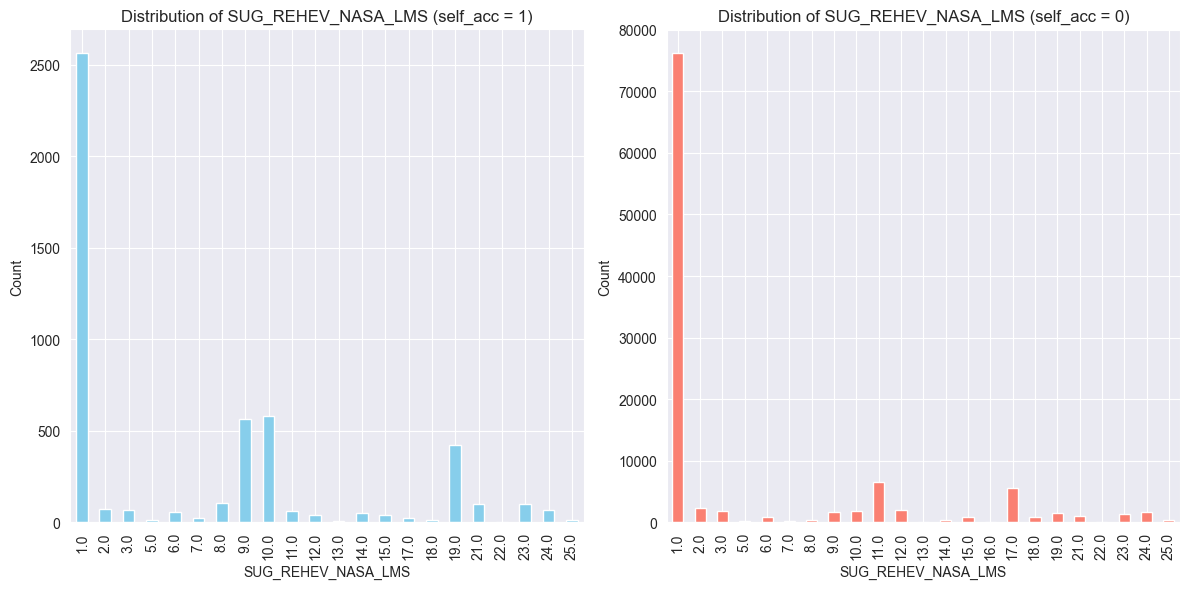

In [29]:
#we passed check .


In [30]:
import matplotlib.pyplot as plt

# Filter df1 for self_acc = 1 and self_acc = 0
self_acc_ids = df1[df1['self_acc'] == 1]['pk_teuna_fikt']
non_self_acc_ids = df1[df1['self_acc'] == 0]['pk_teuna_fikt']

# Filter df2 based on these IDs
df2_self = df2[df2['pk_teuna_fikt'].isin(self_acc_ids)]
df2_non_self = df2[df2['pk_teuna_fikt'].isin(non_self_acc_ids)]

# Plot the distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df2_self['SUG_REHEV_NASA_LMS'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of SUG_REHEV_NASA_LMS (self_acc = 1)")
plt.xlabel("SUG_REHEV_NASA_LMS")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
df2_non_self['SUG_REHEV_NASA_LMS'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Distribution of SUG_REHEV_NASA_LMS (self_acc = 0)")
plt.xlabel("SUG_REHEV_NASA_LMS")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [31]:
# this is getting interesting ... as we can see , many self claims are motorcycles

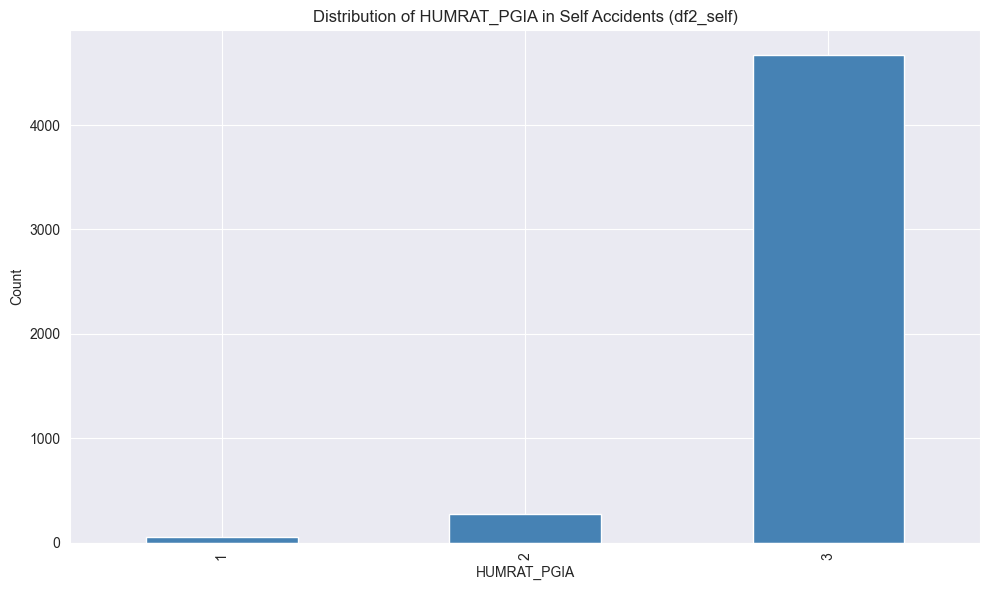

In [32]:
# why would you claim insurance in this case ? a. big damage b.death ? c.you need ambulance and
# someone else called it ...

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df2_self['HUMRAT_PGIA'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of HUMRAT_PGIA in Self Accidents (df2_self)")
plt.xlabel("HUMRAT_PGIA")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


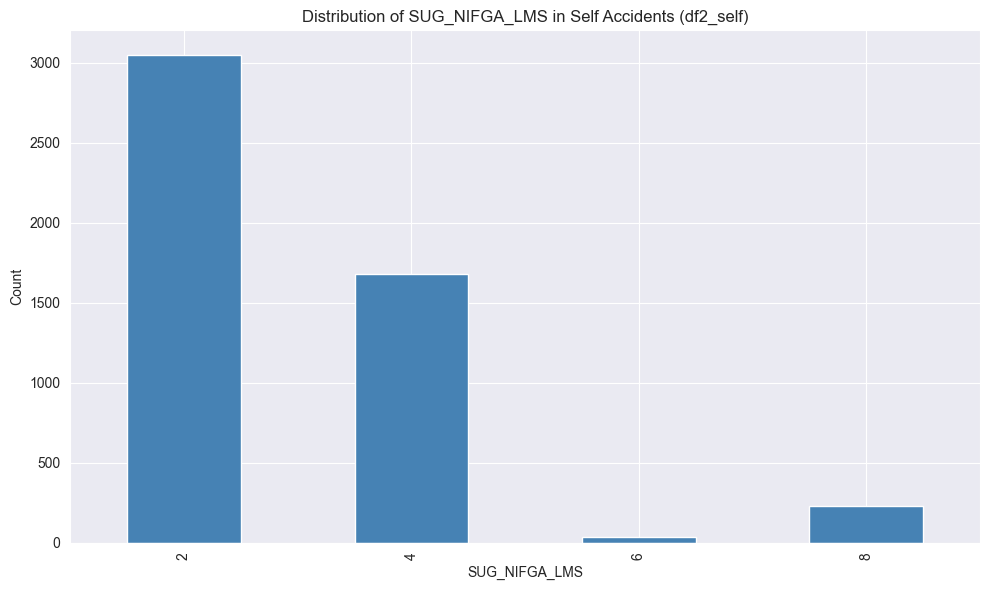

In [34]:
# yeah .. seems like people just wrap themselves around trees or something .
# this is weird .

In [35]:


plt.figure(figsize=(10, 6))
df2_self['SUG_NIFGA_LMS'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of SUG_NIFGA_LMS in Self Accidents (df2_self)")
plt.xlabel("SUG_NIFGA_LMS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


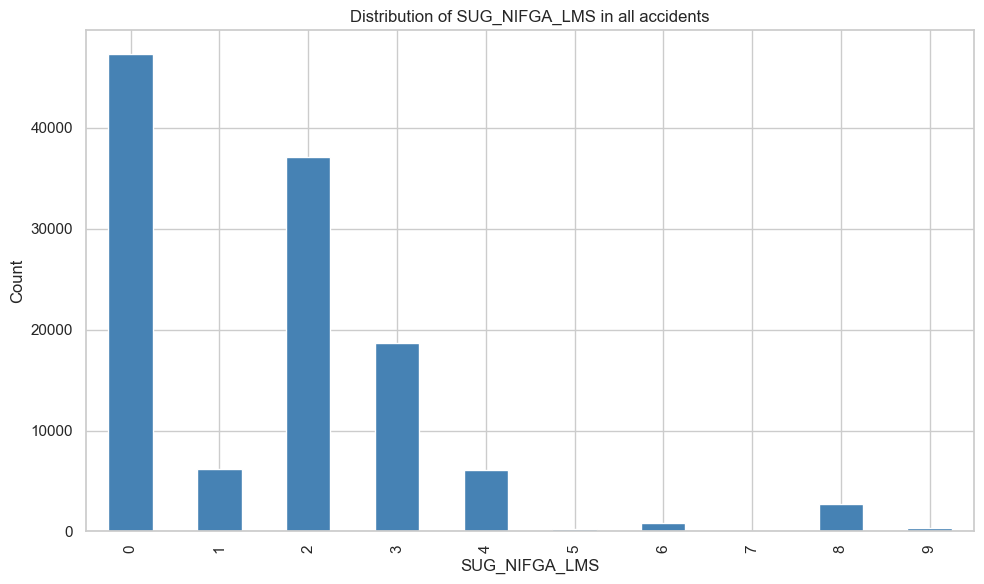

In [123]:
# so we have 3K cars , and 2K bikes .. wow .. now we check in the non self .

In [37]:
#check for whole df2 how many of which we have

plt.figure(figsize=(10, 6))
df2['SUG_NIFGA_LMS'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of SUG_NIFGA_LMS in all accidents")
plt.xlabel("SUG_NIFGA_LMS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [38]:
# notice zero means that the driver was not injured , we should split the df2 to moto or not ...

In [39]:
df2['bike'] = df2['SUG_REHEV_NASA_LMS'].apply(lambda x: 1 if x in [8, 9, 10, 19] else 0)

np.int64(7146)

In [124]:
df2['bike'].sum()

Number of bike-related rows (bike == 1): 7146
Number of non-bike-related rows (bike == 0): 112340
Proportion of bike accidents from all accidents: 0.05980616976047403


In [41]:
bike_counts = df2['bike'].value_counts()

print("Number of bike-related rows (bike == 1):", bike_counts.get(1, 0))
print("Number of non-bike-related rows (bike == 0):", bike_counts.get(0, 0))
print("Proportion of bike accidents from all accidents:",bike_counts.get(1, 0)/df2.shape[0])


,pk_teuna_fikt,MISPAR_REHEV_fikt,ZEHUT_fikt,SHNAT_TEUNA,HODESH_TEUNA,SUG_MEORAV,SHNAT_HOZAA,KVUZA_GIL,MIN,SUG_REHEV_NASA_LMS,...,KVUTZAT_OHLUSIYA_LMS,MAHOZ_MEGURIM,NAFA_MEGURIM,EZOR_TIVI_MEGURIM,MAAMAD_MINIZIPALI_MEGURIM,ZURAT_ISHUV_MEGURIM,SUG_TIK,ShimushBeAvizareyBetihut_LMS,PtiraMeuheret_LMS,bike
0,2023000009,1,2,2023,4,2,2010,7,1,21.0,...,1,5.0,51,513.0,0.0,14.0,1,NaN,NaN,0
1,2023000009,2,1,2023,4,1,0,99,0,8.0,...,1,NaN,99,NaN,NaN,NaN,1,NaN,NaN,1
2,2023000011,0,2,2023,5,3,0,17,1,NaN,...,1,4.0,42,421.0,0.0,15.0,1,1.0,NaN,0
3,2023000011,1,1,2023,5,1,0,99,0,17.0,...,1,NaN,99,NaN,NaN,NaN,1,NaN,NaN,0
4,2023000013,1,2,2023,7,1,1985,13,1,11.0,...,1,4.0,43,432.0,0.0,15.0,1,NaN,NaN,0
5,2023000013,2,1,2023,7,2,2002,9,1,1.0,...,1,4.0,44,442.0,0.0,13.0,1,1.0,NaN,0
6,2023000014,1,1,2023,1,1,2004,8,1,1.0,...,1,3.0,31,311.0,12.0,33.0,1,NaN,NaN,0
7,2023000014,2,2,2023,1,2,2000,9,2,1.0,...,1,3.0,31,311.0,0.0,16.0,1,1.0,NaN,0
8,2023000021,1,1,2023,6,2,0,4,1,15.0,...,2,1.0,11,111.0,0.0,12.0,1,NaN,NaN,0
9,2023000021,2,2,2023,6,1,2022,4,1,1.0,...,1,7.0,76,760.0,0.0,16.0,1,NaN,NaN,0


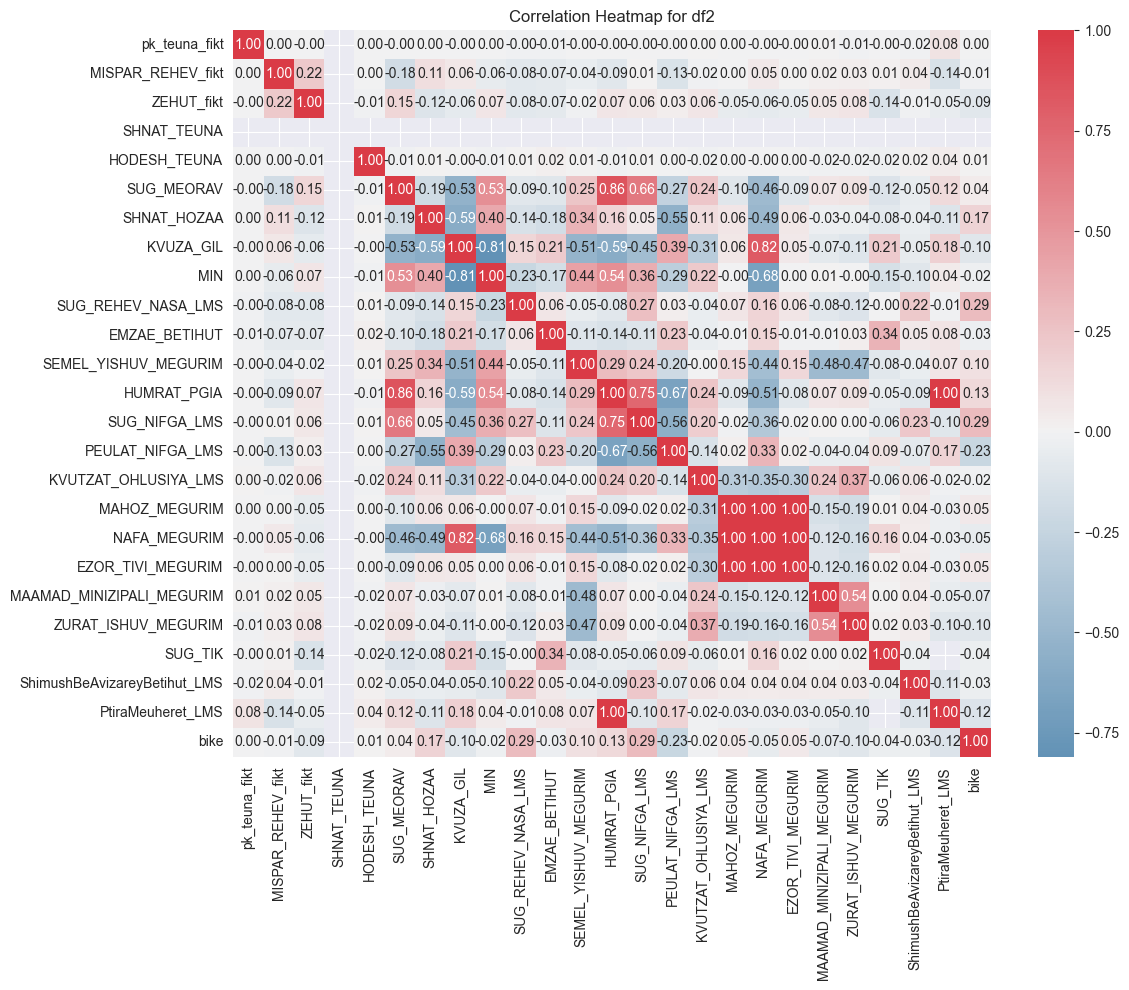

In [42]:
df2.head(10)

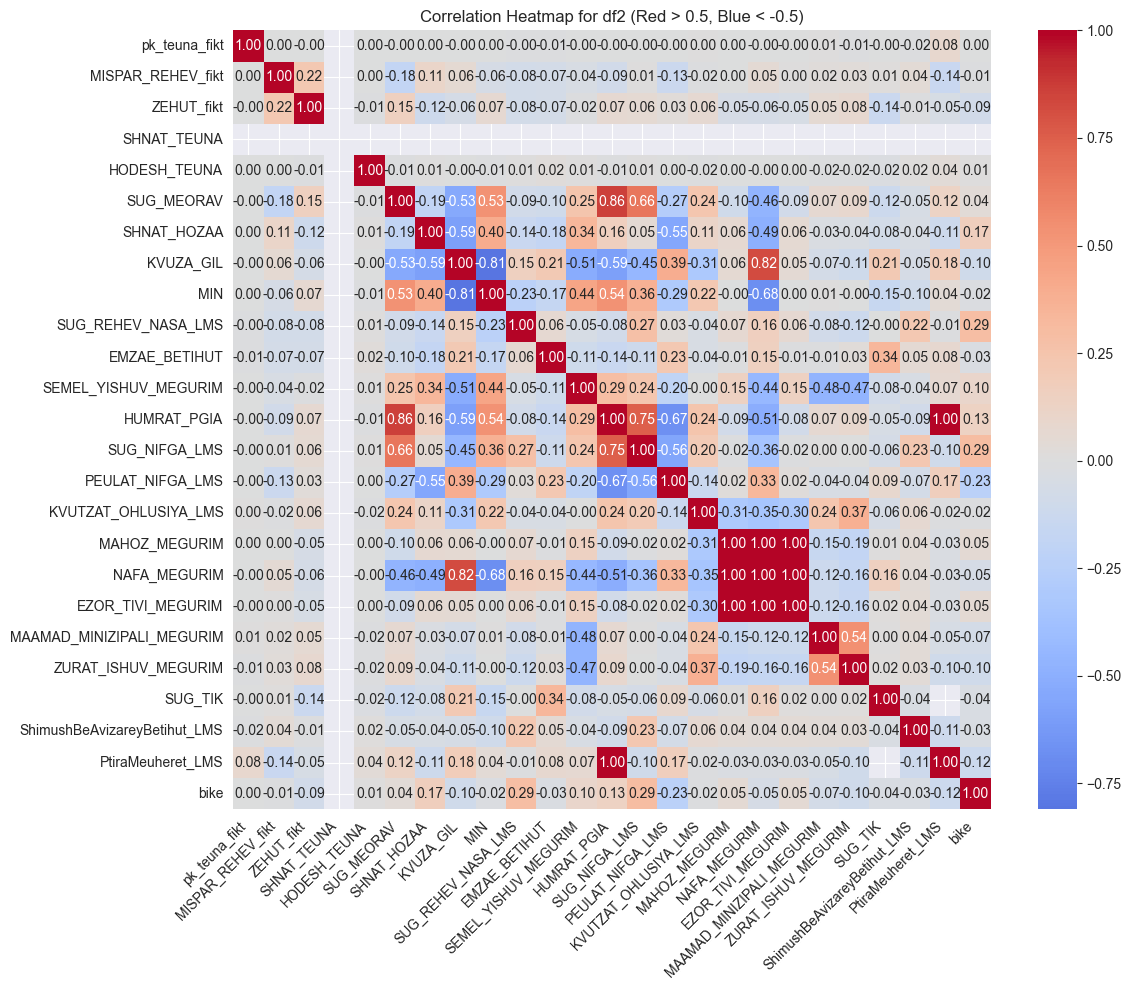

In [43]:
#we check correlation , maybe something there ..
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(240, 10, as_cmap=True), center=0, cbar=True)
plt.title("Correlation Heatmap for df2")
plt.tight_layout()
plt.show()


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df2.corr()

# Create a mask for values to color
mask_red = corr_matrix > 0.5
mask_blue = corr_matrix < -0.5

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True)

plt.title("Correlation Heatmap for df2 (Red > 0.5, Blue < -0.5)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


(HUMRAT_PGIA, PtiraMeuheret_LMS)                     1.000000
(MAHOZ_MEGURIM, PEULAT_NIFGA_LMS)                    0.021763
(HODESH_TEUNA, SUG_TIK)                              0.022556
(HODESH_TEUNA, EMZAE_BETIHUT)                        0.022821
(MISPAR_REHEV_fikt, MAAMAD_MINIZIPALI_MEGURIM)       0.024188
                                                       ...   
(SHNAT_HOZAA, KVUTZAT_OHLUSIYA_LMS)                  0.112854
(PtiraMeuheret_LMS, ShimushBeAvizareyBetihut_LMS)    0.113990
(ZEHUT_fikt, SHNAT_HOZAA)                            0.115120
(EZOR_TIVI_MEGURIM, MAAMAD_MINIZIPALI_MEGURIM)       0.117380
(SUG_TIK, PtiraMeuheret_LMS)                              NaN
Length: 300, dtype: float64


In [45]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = df2.corr()

# Unstack the matrix to get pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
filtered_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort by absolute correlation value in descending order
sorted_pairs = filtered_pairs.abs().sort_values(ascending=False)

# Drop duplicate pairs (e.g., (A,B) and (B,A))
unique_pairs = sorted_pairs.groupby(sorted_pairs.index.map(frozenset)).first()

# Print the top correlated pairs
print(unique_pairs)

(HUMRAT_PGIA, PtiraMeuheret_LMS)                       1.000000
(MAHOZ_MEGURIM, PEULAT_NIFGA_LMS)                      0.021763
(HODESH_TEUNA, SUG_TIK)                                0.022556
(HODESH_TEUNA, EMZAE_BETIHUT)                          0.022821
(MISPAR_REHEV_fikt, MAAMAD_MINIZIPALI_MEGURIM)         0.024188
(bike, EMZAE_BETIHUT)                                  0.027050
(ZURAT_ISHUV_MEGURIM, EMZAE_BETIHUT)                   0.027119
(MIN, bike)                                            0.020788
(PEULAT_NIFGA_LMS, SUG_REHEV_NASA_LMS)                 0.028137
(MISPAR_REHEV_fikt, ZURAT_ISHUV_MEGURIM)               0.028522
(PtiraMeuheret_LMS, NAFA_MEGURIM)                      0.029283
(EZOR_TIVI_MEGURIM, PtiraMeuheret_LMS)                 0.029305
(ZEHUT_fikt, PEULAT_NIFGA_LMS)                         0.030989
(MAHOZ_MEGURIM, PtiraMeuheret_LMS)                     0.031609
(ZURAT_ISHUV_MEGURIM, ShimushBeAvizareyBetihut_LMS)    0.033032
(SHNAT_HOZAA, MAAMAD_MINIZIPALI_MEGURIM)

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


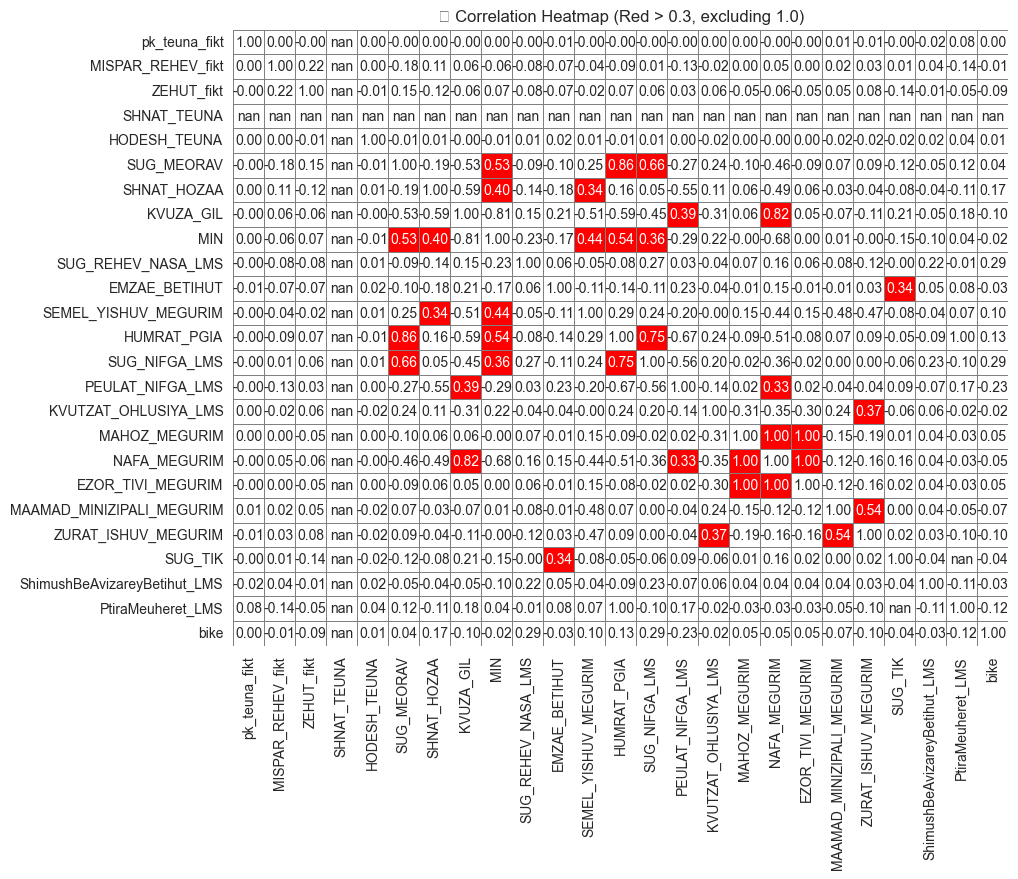

In [46]:
print(unique_pairs.head(20))

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df2.corr()

# Mask for values to highlight (above 0.3 but not 1.0)
highlight_mask = (corr_matrix > 0.3) & (corr_matrix != 1.0)

# Create a custom color map: red for highlight, white for others
cmap = sns.color_palette(["white", "red"])

# Create a matrix for plotting: 1 where highlight, 0 elsewhere
plot_matrix = highlight_mask.astype(int)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(plot_matrix, annot=corr_matrix.round(2), fmt=".2f", cmap=cmap, cbar=False, linewidths=0.5, linecolor='gray')
plt.title("🔴 Correlation Heatmap (Red > 0.3, excluding 1.0)")
plt.show()

🔝 Top 10 Most Correlated Feature Pairs:
(HUMRAT_PGIA, PtiraMeuheret_LMS)                     1.000000
(EZOR_TIVI_MEGURIM, NAFA_MEGURIM)                    0.998635
(MAHOZ_MEGURIM, NAFA_MEGURIM)                        0.996826
(MAHOZ_MEGURIM, EZOR_TIVI_MEGURIM)                   0.995239
(SUG_MEORAV, HUMRAT_PGIA)                            0.863040
(KVUZA_GIL, NAFA_MEGURIM)                            0.819967
(KVUZA_GIL, MIN)                                    -0.810004
(HUMRAT_PGIA, SUG_NIFGA_LMS)                         0.749531
(MIN, NAFA_MEGURIM)                                 -0.678858
(PEULAT_NIFGA_LMS, HUMRAT_PGIA)                     -0.674716
(SUG_MEORAV, SUG_NIFGA_LMS)                          0.657057
(SHNAT_HOZAA, KVUZA_GIL)                            -0.588466
(KVUZA_GIL, HUMRAT_PGIA)                            -0.587802
(PEULAT_NIFGA_LMS, SUG_NIFGA_LMS)                   -0.559269
(SHNAT_HOZAA, PEULAT_NIFGA_LMS)                     -0.551531
(ZURAT_ISHUV_MEGURIM, MAAMAD_M

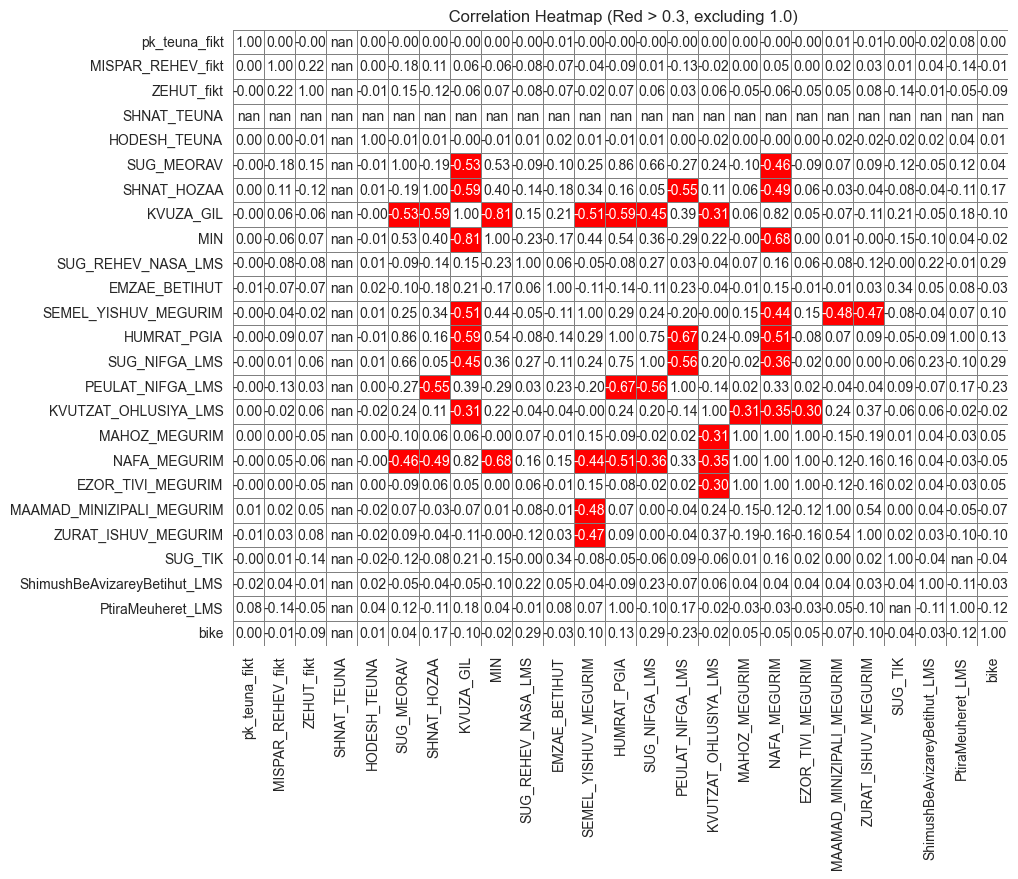

In [48]:
import pandas as pd

# Compute correlation matrix
corr_matrix = df2.corr()

# Unstack to get pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
filtered_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (e.g., (A,B) and (B,A))
unique_pairs = filtered_pairs.groupby(filtered_pairs.index.map(frozenset)).first().dropna()

# Sort by absolute correlation
sorted_pairs = unique_pairs.sort_values(key=lambda x: x.abs(), ascending=False)

# Top 10 most correlated pairs
print("🔝 Top 10 Most Correlated Feature Pairs:")
print(sorted_pairs.head(50))

# Bottom 10 least correlated pairs
print("\n🔻 Bottom 10 Least Correlated Feature Pairs:")
print(sorted_pairs.tail(10))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df2.corr()

# Mask for values to highlight (above 0.3 but not 1.0)
highlight_mask = (corr_matrix < -0.3) & (corr_matrix != 1.0)

# Create a custom color map: red for highlight, white for others
cmap = sns.color_palette(["white", "red"])

# Create a matrix for plotting: 1 where highlight, 0 elsewhere
plot_matrix = highlight_mask.astype(int)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(plot_matrix, annot=corr_matrix.round(2), fmt=".2f", cmap=cmap, cbar=False, linewidths=0.5, linecolor='gray')
plt.title(" Correlation Heatmap (Red > 0.3, excluding 1.0)")
plt.show()

In [ ]:
@@@@ add correlation for less parameters (change vehicles to categories like at the end . ... )

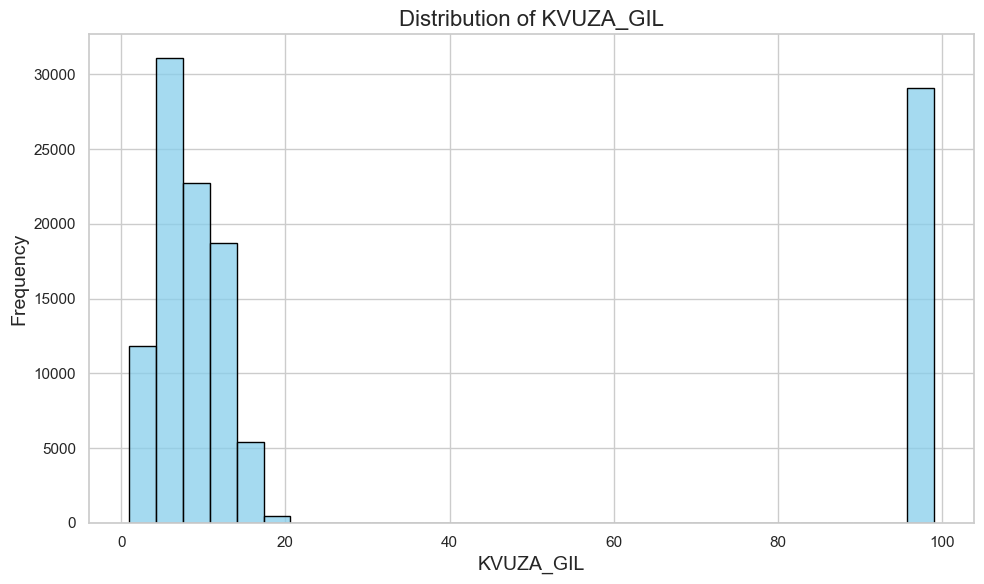

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2["KVUZA_GIL"], bins=30, kde=False, color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Distribution of KVUZA_GIL", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

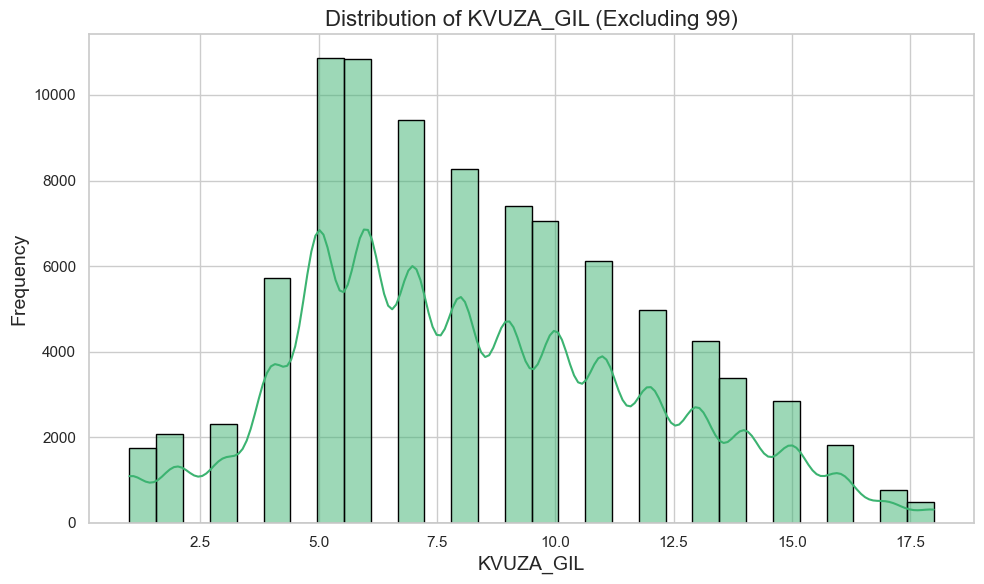

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 90376.
  res = hypotest_fun_out(*samples, **kwds)


📊 Shapiro-Wilk Test:
Statistic = 0.9734, p-value = 0.0000

📊 Kolmogorov-Smirnov Test:
Statistic = 0.1112, p-value = 0.0000


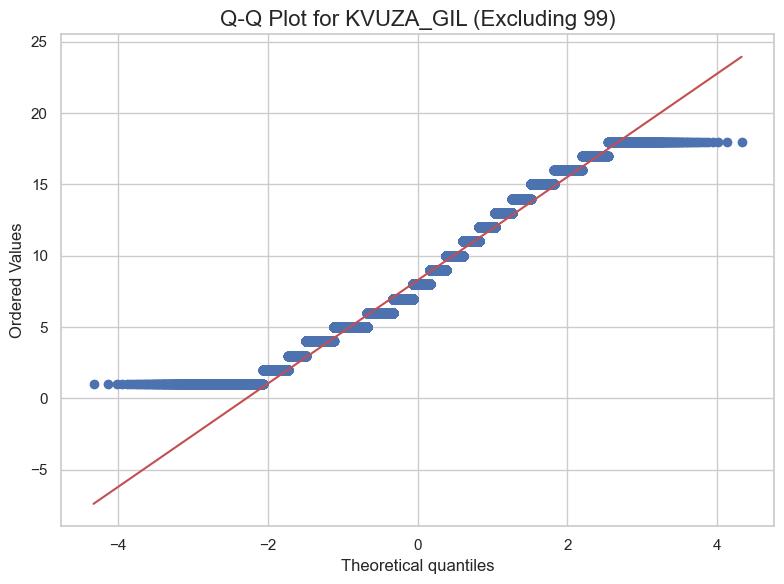

In [51]:
# remove the 99 = unknown (HOW DONT YOU KNOW?!) , check for normality..


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, probplot

# Step 1: Filter the data
filtered_data = df2[df2["KVUZA_GIL"] != 99]["KVUZA_GIL"].dropna()

# Step 2: Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, bins=30, kde=True, color="mediumseagreen", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (Excluding 99)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 3: Normality verbal test results
shapiro_stat, shapiro_p = shapiro(filtered_data)
ks_stat, ks_p = kstest(filtered_data, 'norm', args=(filtered_data.mean(), filtered_data.std()))

print("📊 Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test:")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 4: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (Excluding 99)", fontsize=16)
plt.tight_layout()
plt.show()

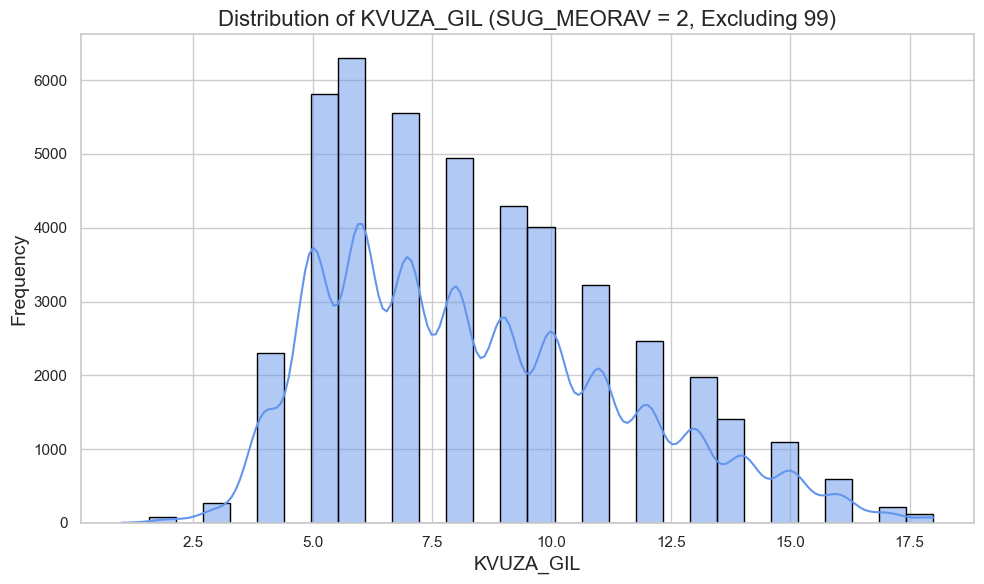

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44674.
  res = hypotest_fun_out(*samples, **kwds)


📊 Shapiro-Wilk Test (df_naag):
Statistic = 0.9508, p-value = 0.0000

📊 Kolmogorov-Smirnov Test (df_naag):
Statistic = 0.1319, p-value = 0.0000


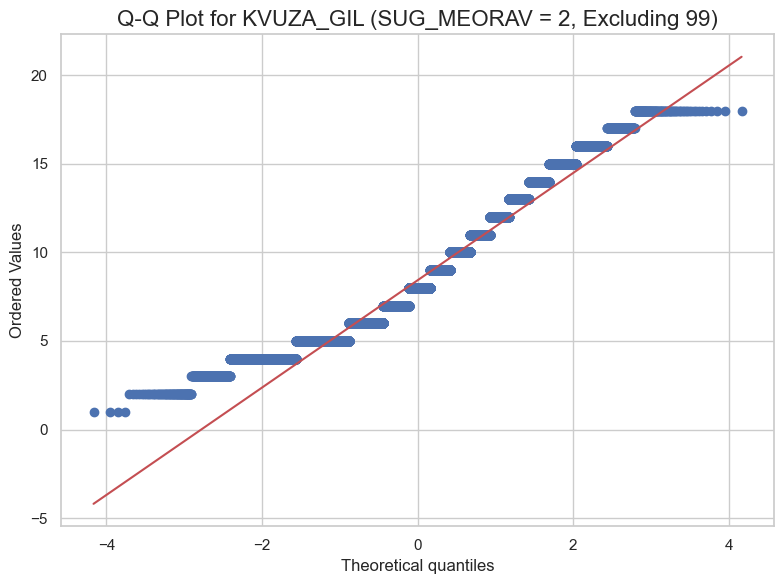

In [53]:
# we should only check for ages of drivers .. not infants and so on , as the driver is the interest.
# lets filter based on sug meorav ?

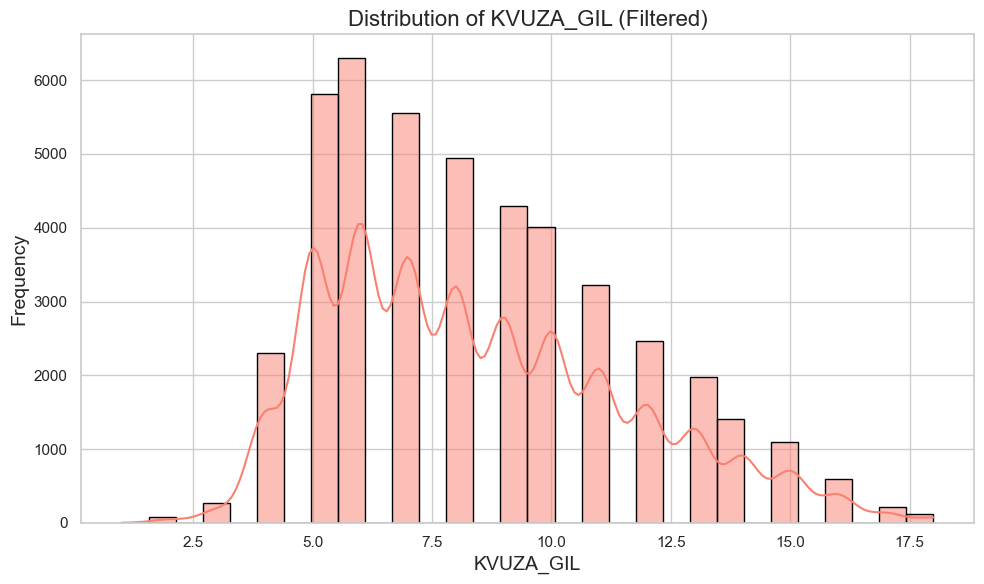

📊 Shapiro-Wilk Test:
Statistic = 0.9508, p-value = 0.0000

📊 Kolmogorov-Smirnov Test:
Statistic = 0.1319, p-value = 0.0000


C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44674.
  res = hypotest_fun_out(*samples, **kwds)


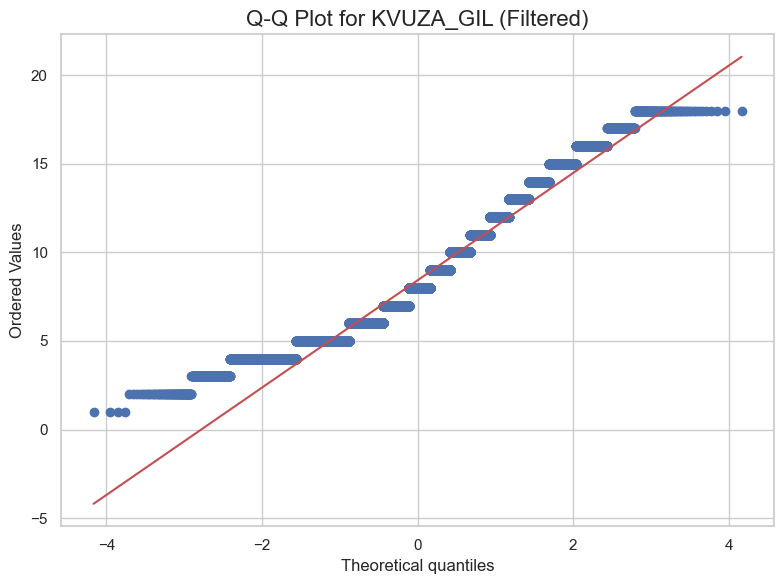

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, probplot, norm

# Step 1: Create df_naag where SUG_MEORAV == 2
df_naag = df2[df2["SUG_MEORAV"] == 2]

# Step 2: Filter KVUZA_GIL != 99 and drop NaNs
filtered_naag = df_naag[df_naag["KVUZA_GIL"] != 99]["KVUZA_GIL"].dropna()

# Step 3: Plot distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_naag, bins=30, kde=True, color="cornflowerblue", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (SUG_MEORAV = 2, Excluding 99)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Normality verbal test results
shapiro_stat, shapiro_p = shapiro(filtered_naag)
ks_stat, ks_p = kstest(filtered_naag, 'norm', args=(filtered_naag.mean(), filtered_naag.std()))

print("📊 Shapiro-Wilk Test (df_naag):")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test (df_naag):")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 5: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_naag, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (SUG_MEORAV = 2, Excluding 99)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, probplot, norm

# Step 1: Filter df2 to create df_naag
df_naag = df2[
    (df2["SUG_MEORAV"] == 2) &
    (df2["SUG_NIFGA_LMS"] != 1) &
    (df2["KVUZA_GIL"] != 99)
]

# Step 2: Extract KVUZA_GIL and drop NaNs
filtered_kvuza = df_naag["KVUZA_GIL"].dropna()

# Step 3: Plot distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_kvuza, bins=30, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (Filtered)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Normality verbal test results
shapiro_stat, shapiro_p = shapiro(filtered_kvuza)
ks_stat, ks_p = kstest(filtered_kvuza, 'norm', args=(filtered_kvuza.mean(), filtered_kvuza.std()))

print("📊 Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test:")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 5: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_kvuza, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (Filtered)", fontsize=16)
plt.tight_layout()
plt.show()

Chi-square statistic: 4477.116137066657
p-value: 0.0
Degrees of freedom: 3

Contingency Table:
HUMRAT_PGIA       0    1    2      3
vehicle_type                        
Car           30804  109  810  47059
Motorcycle      780   78  632   5656


In [56]:
import pandas as pd
import scipy.stats as stats

# Filter relevant rows
df_filtered = df2[df2["SUG_REHEV_NASA_LMS"].isin([1, 8, 9, 10, 19])].copy()

df_filtered["vehicle_type"] = df_filtered["SUG_REHEV_NASA_LMS"].apply(
    lambda x: "Car" if x == 1 else "Motorcycle"
)

# Create contingency table
contingency = pd.crosstab(df_filtered["vehicle_type"], df_filtered["HUMRAT_PGIA"])

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nContingency Table:")
print(contingency)

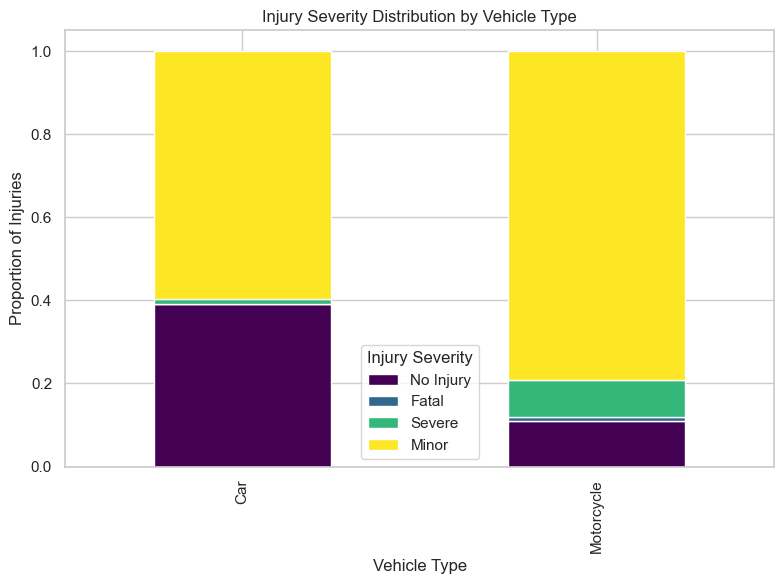

In [57]:
# we reject null H , bikes are far more dangerouis .


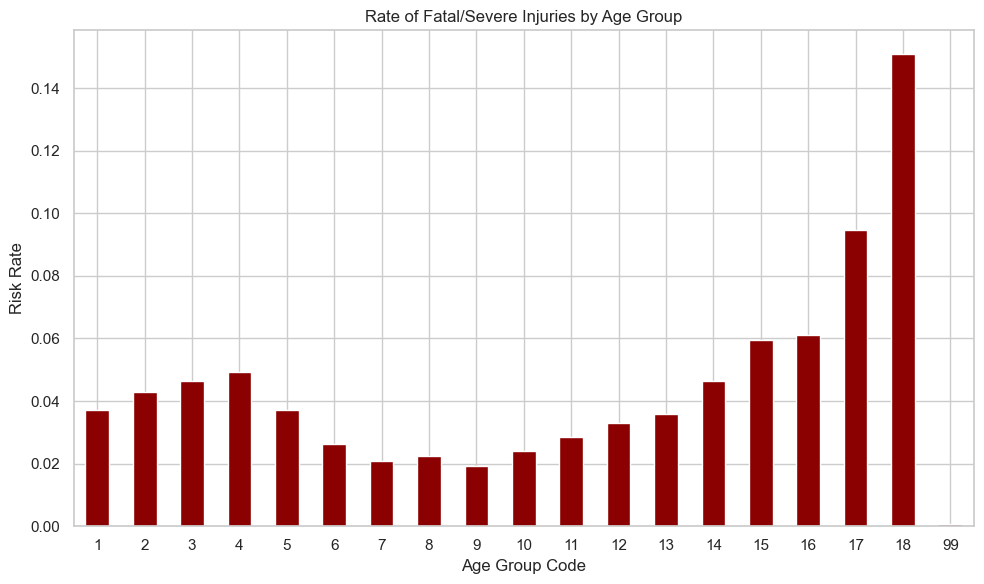

In [58]:
import matplotlib.pyplot as plt

# Group and normalize injury severity
injury_counts = df_filtered.groupby("vehicle_type")["HUMRAT_PGIA"].value_counts(normalize=True).unstack()

# Plot
injury_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,6))
plt.title("Injury Severity Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Proportion of Injuries")
plt.legend(title="Injury Severity", labels=["No Injury", "Fatal", "Severe", "Minor"])
plt.tight_layout()
plt.show()

In [60]:
# Filter fatal and severe injuries
dangerous = df2[df2["HUMRAT_PGIA"].isin([1, 2])]

# Group by age
age_danger = dangerous["KVUZA_GIL"].value_counts().sort_index()

# Normalize by total cases per age group
age_total = df2["KVUZA_GIL"].value_counts().sort_index()
age_risk_rate = (age_danger / age_total).fillna(0)

# Plot
age_risk_rate.plot(kind="bar", color="darkred", figsize=(10,6))
plt.title("Rate of Fatal/Severe Injuries by Age Group")
plt.xlabel("Age Group Code")
plt.ylabel("Risk Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.081166
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        severe_or_fatal   No. Observations:                85928
Model:                          Logit   Df Residuals:                    85906
Method:                           MLE   Df Model:                           21
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.1361
Time:                        19:27:48   Log-Likelihood:                -6974.5
converged:                       True   LL-Null:                       -8073.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.8980      1.150     -6.865      0.000     -10.153      -5.643
is_motorcycle     2

In [ ]:
import statsmodels.api as sm
import numpy as np

# Step 1: Create binary outcome
df_filtered["severe_or_fatal"] = df_filtered["HUMRAT_PGIA"].apply(lambda x: 1 if x in [1, 2] else 0)

# Step 2: Encode vehicle type
df_filtered["is_motorcycle"] = df_filtered["vehicle_type"].apply(lambda x: 1 if x == "Motorcycle" else 0)

# Step 3: Select relevant columns
model_df = df_filtered[["severe_or_fatal", "is_motorcycle", "KVUZA_GIL", "MIN"]].dropna()

# Step 4: Convert categorical variables to strings (for one-hot encoding)
model_df["KVUZA_GIL"] = model_df["KVUZA_GIL"].astype(str)
model_df["MIN"] = model_df["MIN"].astype(str)

# Step 5: One-hot encode
model_df = pd.get_dummies(model_df, columns=["KVUZA_GIL", "MIN"], drop_first=True)

# Step 6: Define X and y
y = model_df["severe_or_fatal"].astype(float)
X = model_df.drop("severe_or_fatal", axis=1).astype(float)

# Step 7: Add constant
X = sm.add_constant(X)

# Step 8: Fit model
model = sm.Logit(y, X).fit()
print(model.summary())

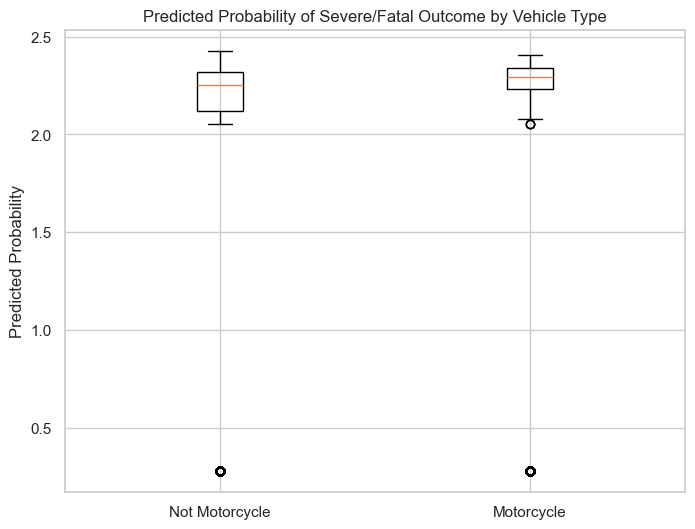

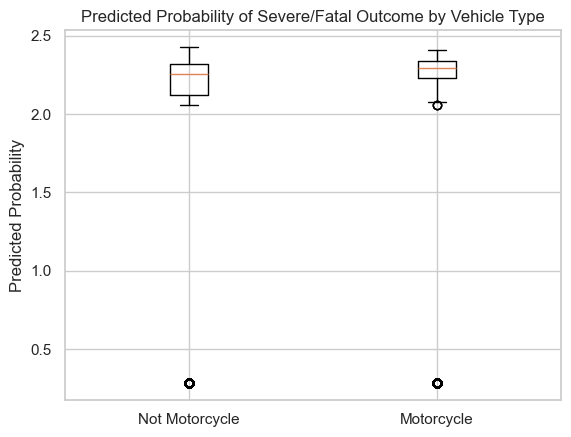

In [132]:
import matplotlib.pyplot as plt

# Predict probabilities
model_df["predicted_prob"] = model.predict(X)

# Plot predicted probabilities by vehicle type
plt.figure(figsize=(8, 6))
plt.boxplot([
    model_df[model_df["is_motorcycle"] == 0]["predicted_prob"],
    model_df[model_df["is_motorcycle"] == 1]["predicted_prob"]
], tick_labels=["Not Motorcycle", "Motorcycle"])

plt.title("Predicted Probability of Severe/Fatal Outcome by Vehicle Type")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1596690036.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="is_motorcycle", y="normalized_prob", data=model_df, palette="Set2")


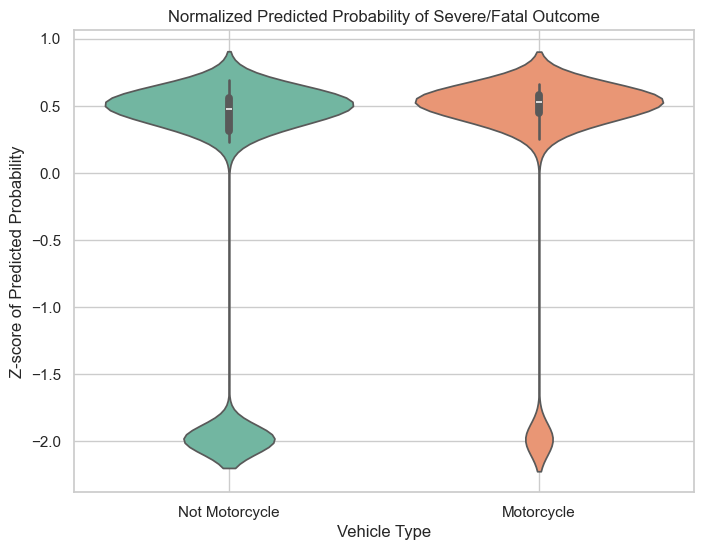

In [129]:
import matplotlib.pyplot as plt

# Predict probabilities
model_df["predicted_prob"] = model.predict(X)

# Plot predicted probabilities by vehicle type
plt.figure()
plt.boxplot([
    model_df[model_df["is_motorcycle"] == 0]["predicted_prob"],
    model_df[model_df["is_motorcycle"] == 1]["predicted_prob"]
], tick_labels=["Not Motorcycle", "Motorcycle"])

plt.title("Predicted Probability of Severe/Fatal Outcome by Vehicle Type")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\893206790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="is_motorcycle", y="predicted_prob", data=model_df, palette="Set2", inner="box")


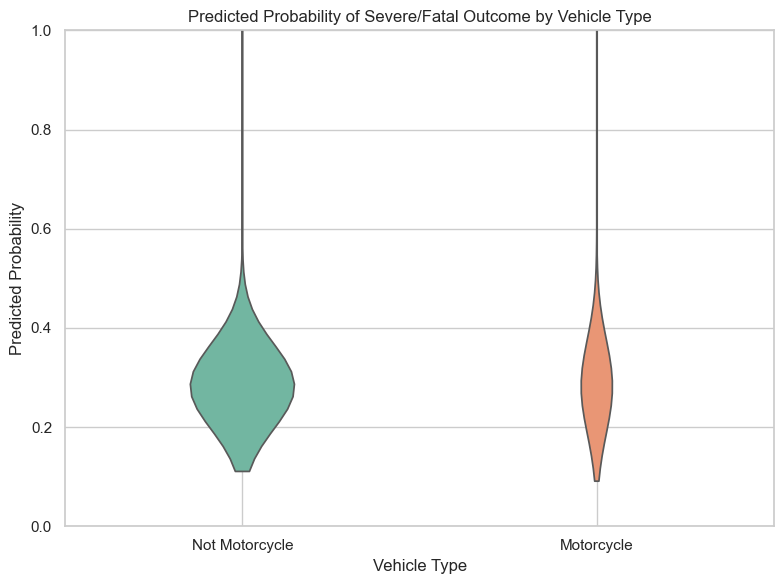

In [ ]:
import numpy as np

def explain_logit_model(model):
    print("📊 Logistic Regression Summary\n")

    # Overall model stats
    print(f"Number of observations: {model.nobs}")
    print(f"Pseudo R-squared: {model.prsquared:.4f}")
    print(f"Log-Likelihood: {model.llf:.1f}")
    print(f"Model significance (LLR p-value): {model.llr_pvalue:.4g}")
    print("\n---\n")

    # Extract coefficients
    coef = model.params
    pvals = model.pvalues
    conf = model.conf_int()

    # Motorcycle effect
    if "is_motorcycle" in coef:
        odds_ratio = np.exp(coef["is_motorcycle"])
        print(f"🏍️ Motorcycle Risk:")
        print(f"  Coefficient: {coef['is_motorcycle']:.4f}")
        print(f"  Odds Ratio: {odds_ratio:.2f}")
        print(f"  p-value: {pvals['is_motorcycle']:.4g}")
        if pvals["is_motorcycle"] < 0.05:
            print("  ✅ Statistically significant: Motorcyclists are more likely to suffer severe/fatal injuries.\n")
        else:
            print("  ❌ Not statistically significant.\n")

    # Age group effects
    print("👶🧓 Age Group Effects:")
    age_vars = [v for v in coef.index if v.startswith("KVUZA_GIL_")]
    for var in age_vars:
        odds = np.exp(coef[var])
        sig = pvals[var] < 0.05
        marker = "✅" if sig else "❌"
        print(f"  {var}: Odds Ratio = {odds:.2f}, p = {pvals[var]:.4g} {marker}")
    print("\n---\n")

    # Gender effects
    print("🚻 Gender Effects:")
    gender_vars = [v for v in coef.index if v.startswith("MIN_")]
    for var in gender_vars:
        odds = np.exp(coef[var])
        sig = pvals[var] < 0.05
        marker = "✅" if sig else "❌"
        print(f"  {var}: Odds Ratio = {odds:.2f}, p = {pvals[var]:.4g} {marker}")

In [61]:
explain_logit_model(model)


In [62]:
# lol , we get that 30-34 have less chance to get into fatal crash .. weird ..

📊 Logistic Regression Summary

Number of observations: 85928
Pseudo R-squared: 0.1361
Log-Likelihood: -6974.5
Model significance (LLR p-value): 0

---

🏍️ Motorcycle Risk:
  Coefficient: 2.0473
  Odds Ratio: 7.75
  p-value: 1.247e-272
  ✅ Statistically significant: Motorcyclists are more likely to suffer severe/fatal injuries.

👶🧓 Age Group Effects:
  KVUZA_GIL_10: Odds Ratio = 0.56, p = 0.007102 ✅
  KVUZA_GIL_11: Odds Ratio = 0.74, p = 0.1542 ❌
  KVUZA_GIL_12: Odds Ratio = 0.86, p = 0.4786 ❌
  KVUZA_GIL_13: Odds Ratio = 0.73, p = 0.1796 ❌
  KVUZA_GIL_14: Odds Ratio = 0.91, p = 0.7002 ❌
  KVUZA_GIL_15: Odds Ratio = 1.58, p = 0.04028 ✅
  KVUZA_GIL_16: Odds Ratio = 1.27, p = 0.351 ❌
  KVUZA_GIL_17: Odds Ratio = 1.42, p = 0.2858 ❌
  KVUZA_GIL_18: Odds Ratio = 2.47, p = 0.00696 ✅
  KVUZA_GIL_2: Odds Ratio = 0.60, p = 0.0875 ❌
  KVUZA_GIL_3: Odds Ratio = 0.71, p = 0.2318 ❌
  KVUZA_GIL_4: Odds Ratio = 0.99, p = 0.9481 ❌
  KVUZA_GIL_5: Odds Ratio = 0.81, p = 0.2878 ❌
  KVUZA_GIL_6: Odds Ratio

In [64]:
age_map = {
    "KVUZA_GIL_1": "00–04",
    "KVUZA_GIL_2": "05–09",
    "KVUZA_GIL_3": "10–14",
    "KVUZA_GIL_4": "15–19",
    "KVUZA_GIL_5": "20–24",
    "KVUZA_GIL_6": "25–29",
    "KVUZA_GIL_7": "30–34",
    "KVUZA_GIL_8": "35–39",
    "KVUZA_GIL_9": "40–44",
    "KVUZA_GIL_10": "45–49",
    "KVUZA_GIL_11": "50–54",
    "KVUZA_GIL_12": "55–59",
    "KVUZA_GIL_13": "60–64",
    "KVUZA_GIL_14": "65–69",
    "KVUZA_GIL_15": "70–74",
    "KVUZA_GIL_16": "75–79",
    "KVUZA_GIL_17": "80–84",
    "KVUZA_GIL_18": "85+",
    "KVUZA_GIL_99": "Unknown"
}

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_odds_ratios(model, title="Odds Ratios with 95% CI"):
    # Extract coefficients, p-values, and confidence intervals
    coef = model.params
    pvals = model.pvalues
    conf = model.conf_int()

    # Calculate odds ratios and CI bounds
    odds_ratios = np.exp(coef)
    ci_lower = np.exp(conf[0])
    ci_upper = np.exp(conf[1])

    # Filter out intercept and non-significant variables
    variables = coef.index
    mask = (variables != "const") & (pvals < 0.05)

    filtered_vars = variables[mask]
    filtered_odds = odds_ratios[mask]
    filtered_lower = ci_lower[mask]
    filtered_upper = ci_upper[mask]

    # Sort by odds ratio
        # Sort by odds ratio
    sorted_idx = np.argsort(filtered_odds.values)
    sorted_vars = filtered_vars[sorted_idx]
    sorted_odds = filtered_odds.iloc[sorted_idx]
    sorted_lower = filtered_lower.iloc[sorted_idx]
    sorted_upper = filtered_upper.iloc[sorted_idx]
    labels = [age_map.get(var, var) for var in sorted_vars]


    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(sorted_odds, range(len(sorted_vars)),
                 xerr=[sorted_odds - sorted_lower, sorted_upper - sorted_odds],
                 fmt='o', color='darkred', ecolor='gray', capsize=4)

    plt.yticks(range(len(sorted_vars)), labels)

    plt.axvline(x=1, color='black', linestyle='--', label="No Effect")
    plt.xlabel("Odds Ratio")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [68]:
plot_odds_ratios(model)

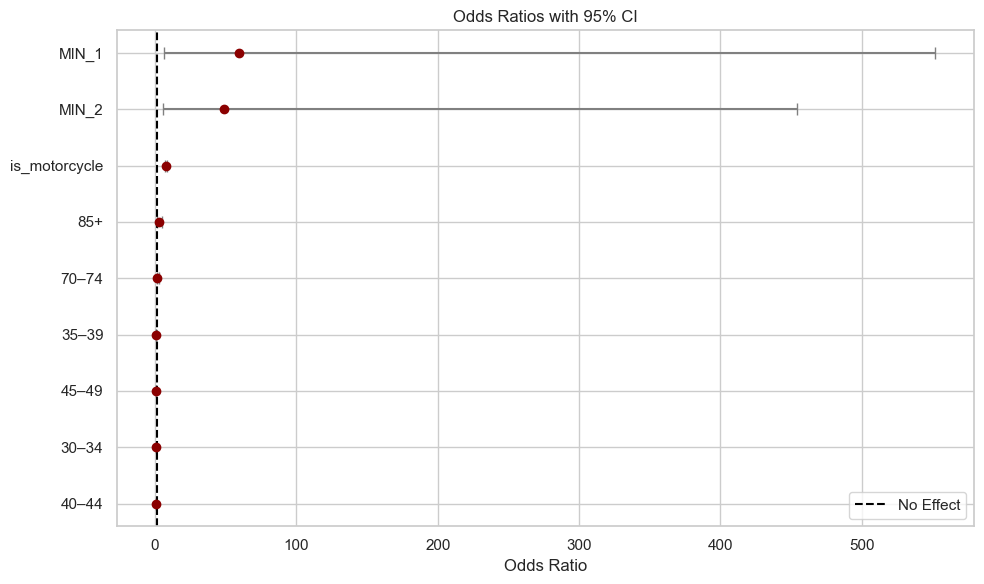

In [69]:
plot_odds_ratios(model)

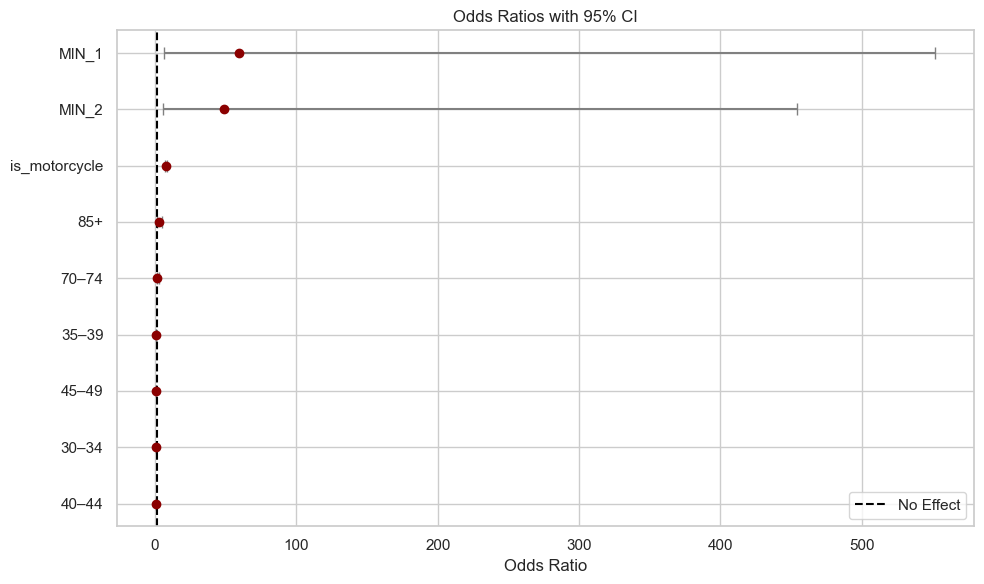

In [70]:
# Filter for motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Filter for fatal injuries (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Count fatalities by age group
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()

# Optional: map age codes to readable ranges
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Rename index
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Display result
print("🛵 Fatalities by Age Group (Motorcycles):\n")
print(fatal_by_age)

In [71]:
# Filter for motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Filter for fatal injuries (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Total fatalities
total_fatalities = len(fatal_motorcycle)
print(f"🛵 Total Motorcycle Fatalities: {total_fatalities}\n")

# Count fatalities by age group
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()

# Optional: map age codes to readable ranges
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Rename index
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Display result
print("📊 Fatalities by Age Group (Motorcycles):\n")
print(fatal_by_age)

🛵 Fatalities by Age Group (Motorcycles):

KVUZA_GIL
15–19       9
20–24      22
25–29      14
30–34       8
35–39       4
40–44       3
45–49       6
50–54       6
60–64       2
70–74       1
75–79       2
Unknown     1
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt

# Define age mapping
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Filter motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Fatalities (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Serious injuries (HUMRAT_PGIA == 2)
serious_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 2]
serious_by_age = serious_motorcycle["KVUZA_GIL"].value_counts().sort_index()
serious_by_age.index = serious_by_age.index.map(age_map)

# Plot fatalities
plt.figure(figsize=(10, 6))
fatal_by_age.plot(kind="bar", color="darkred")
plt.title("🛵 Motorcycle Fatalities by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot serious injuries
plt.figure(figsize=(10, 6))
serious_by_age.plot(kind="bar", color="orange")
plt.title("🩺 Motorcycle Serious Injuries by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Serious Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🛵 Total Motorcycle Fatalities: 78

📊 Fatalities by Age Group (Motorcycles):

KVUZA_GIL
15–19       9
20–24      22
25–29      14
30–34       8
35–39       4
40–44       3
45–49       6
50–54       6
60–64       2
70–74       1
75–79       2
Unknown     1
Name: count, dtype: int64


C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\114371420.py:31: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


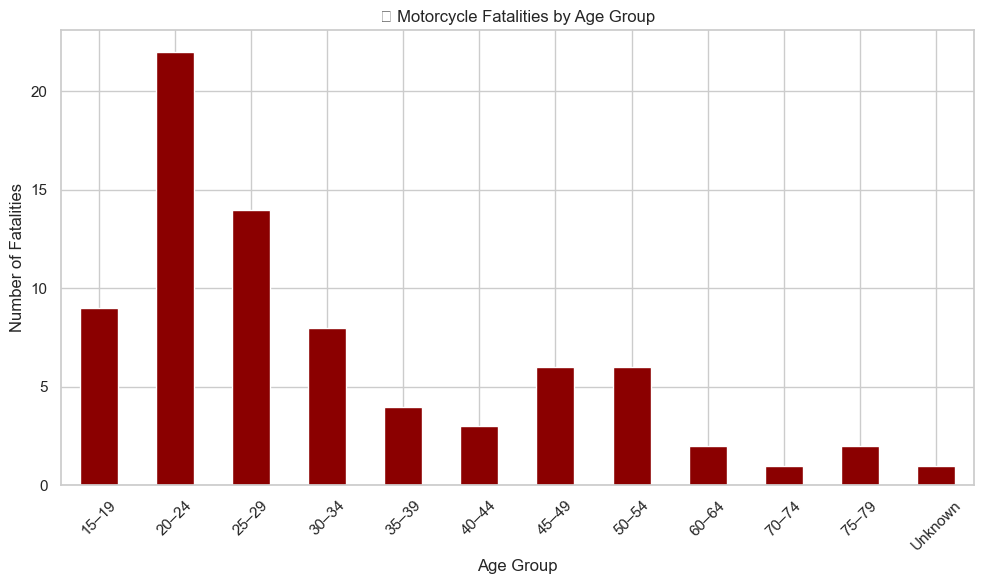

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\114371420.py:41: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


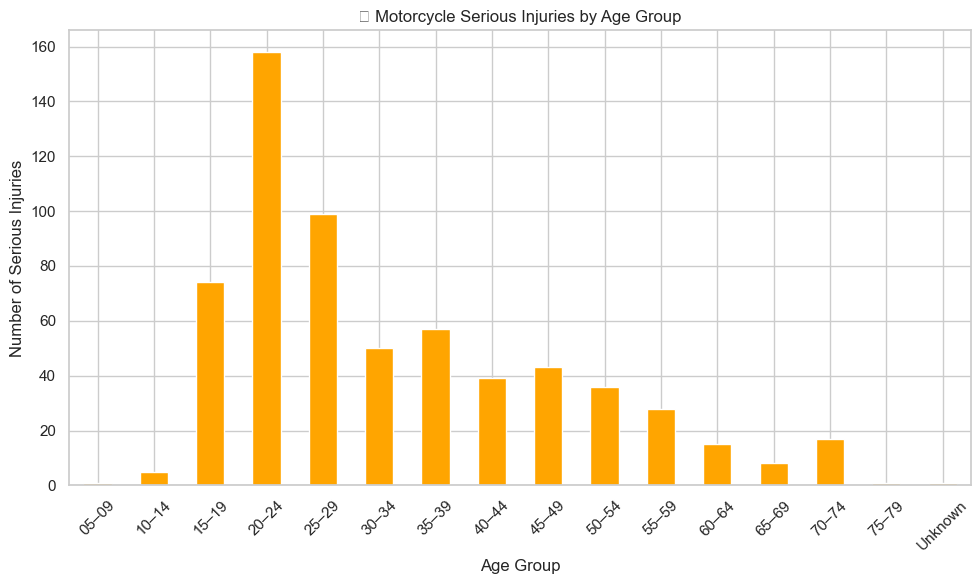

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename first column for clarity
df2 = df2.rename(columns={df2.columns[0]: "ACCIDENT_ID"})

# Filter motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Create a helper DataFrame with all crashes grouped by accident ID
accident_groups = df2.groupby("ACCIDENT_ID")

# Function to classify crash type
def classify_crash(row):
    group = accident_groups.get_group(row["ACCIDENT_ID"])
    if len(group) == 1:
        return "Self Crash"
    else:
        other_vehicles = group["SUG_REHEV_NASA_LMS"].unique()
        others = [v for v in other_vehicles if v not in [8, 9, 10, 19]]
        if not others:
            return "Motorcycle Only"
        elif 1 in others:
            return "Involved Car"
        else:
            return "Involved Other Vehicle"

# Apply classification
motorcycle_df["crash_type"] = motorcycle_df.apply(classify_crash, axis=1)

# Count crash types
crash_counts = motorcycle_df["crash_type"].value_counts()

# Plot
plt.figure(figsize=(8, 6))
crash_counts.plot(kind="bar", color=["gray", "red", "orange", "purple"])
plt.title("🛵 Motorcycle Crash Types")
plt.xlabel("Crash Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3593872089.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcycle_df["crash_type"] = motorcycle_df.apply(classify_crash, axis=1)
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3593872089.py:41: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


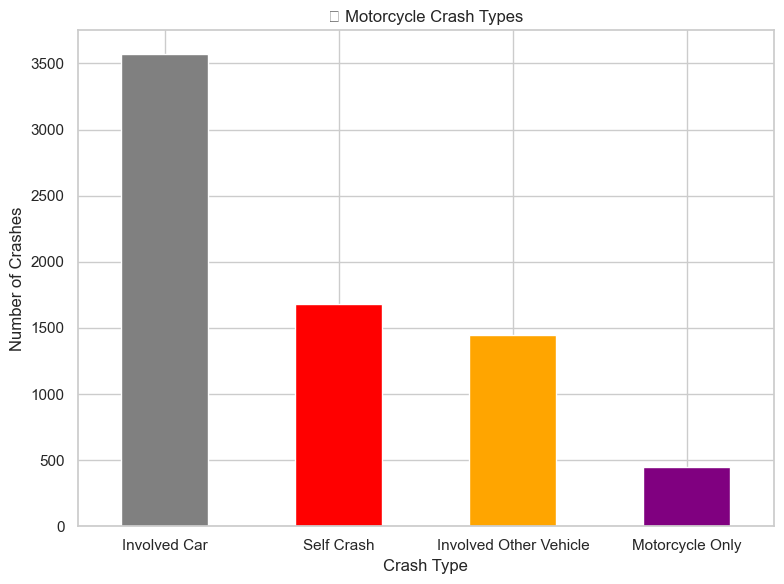

In [74]:
# so it appears that

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
car_df = car_df[car_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]
motorcycle_df = motorcycle_df[motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(8, 5))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(8, 5))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define simplified population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
car_aligned = car_counts.reindex(valid_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed totals
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_car = scale_expected(population_proportions, car_aligned.sum())
expected_motorcycle = scale_expected(population_proportions, motorcycle_aligned.sum())

# Chi-square verbal test results
chi2_car, p_car = stats.chisquare(f_obs=car_aligned.values, f_exp=expected_car.values)
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_aligned.values, f_exp=expected_motorcycle.values)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for 75/25 Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

# Evaluate Group 2 risk
group_2_ratio_car = car_aligned.get(2, 0) / expected_car.get(2, 1)
group_2_ratio_motorcycle = motorcycle_aligned.get(2, 0) / expected_motorcycle.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Car Crash Ratio (Observed/Expected): {group_2_ratio_car:.2f}×")
print(f"Group 2 Motorcycle Crash Ratio (Observed/Expected): {group_2_ratio_motorcycle:.2f}×")

if group_2_ratio_motorcycle > group_2_ratio_car:
    print(f"👉 Group 2 is disproportionately more involved in motorcycle crashes — about {group_2_ratio_motorcycle:.2f}× the expected rate.")
else:
    print(f"👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3468049686.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


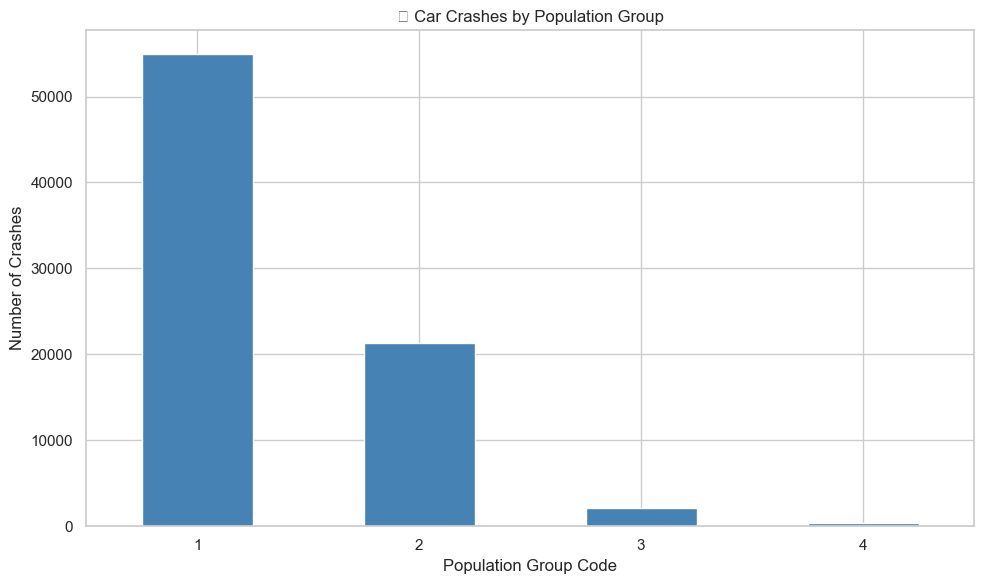

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3468049686.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3468049686.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


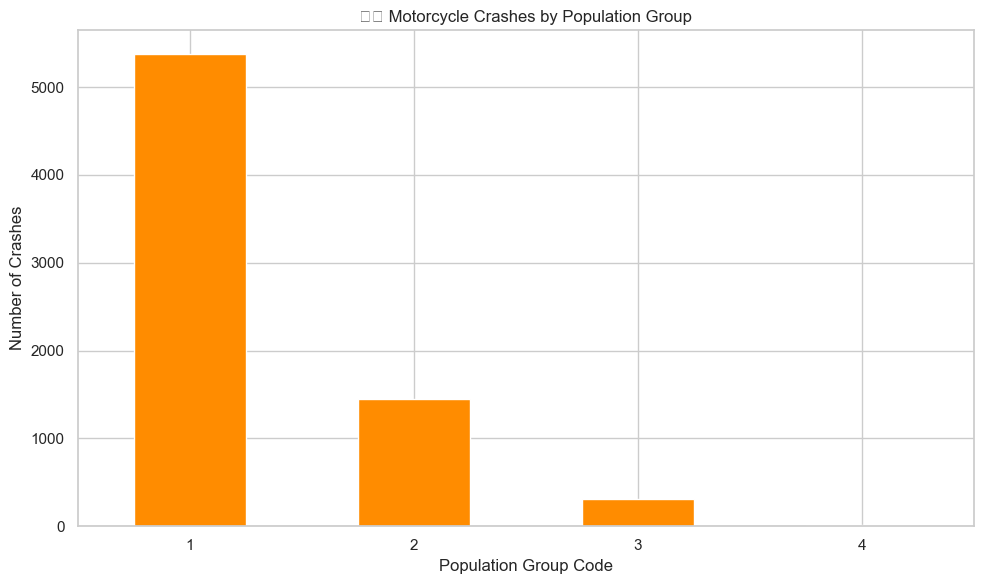

🧪 Chi-Square Test Results:
Chi-square statistic: 214.10
p-value: 0.0000
Degrees of freedom: 3


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Combine both datasets
combined_df = pd.concat([car_df, motorcycle_df])

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
combined_df = combined_df[combined_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count total crashes by population group
combined_counts = combined_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot combined crashes
plt.figure(figsize=(8, 5))
combined_counts.plot(kind="bar", color="purple")
plt.title("🚨 Total Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
combined_aligned = combined_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed total
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_combined = scale_expected(population_proportions, combined_aligned.sum())

# Chi-square test
chi2_combined, p_combined = stats.chisquare(f_obs=combined_aligned.values, f_exp=expected_combined.values)

# Print results
print("🧪 Chi-Square Test Results (Combined Crashes):")
print(f"Total Chi-square: {chi2_combined:.2f}, p-value: {p_combined:.4f}")

# Evaluate Group 2 risk
group_2_ratio = combined_aligned.get(2, 0) / expected_combined.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Crash Ratio (Observed/Expected): {group_2_ratio:.2f}×")

if p_combined < 0.05:
    print(f"👉 Group 2 is statistically more involved in crashes — about {group_2_ratio:.2f}× the expected rate.")
else:
    print(f"👉 No statistically significant difference in crash involvement for Group 2.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2032879989.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


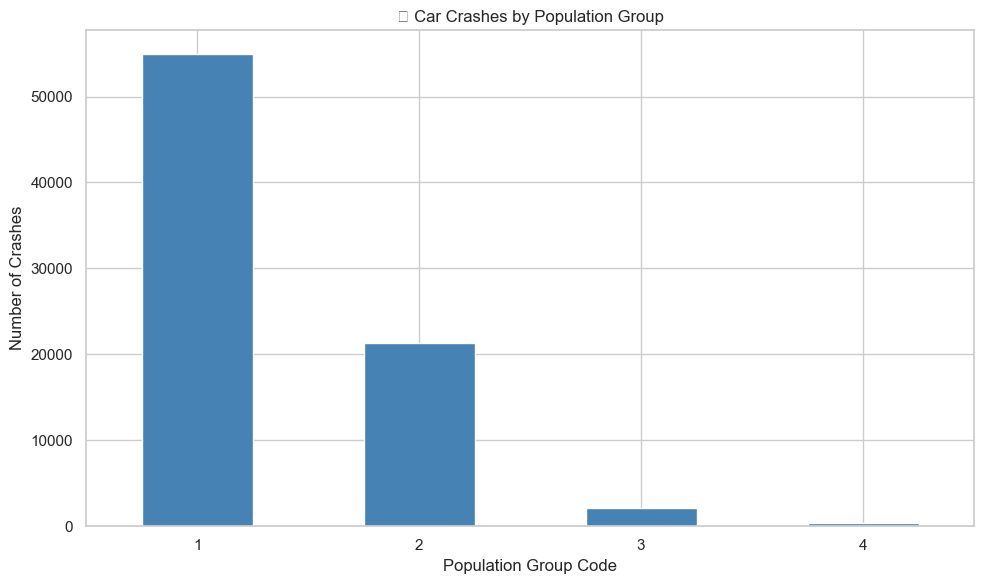

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2032879989.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2032879989.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


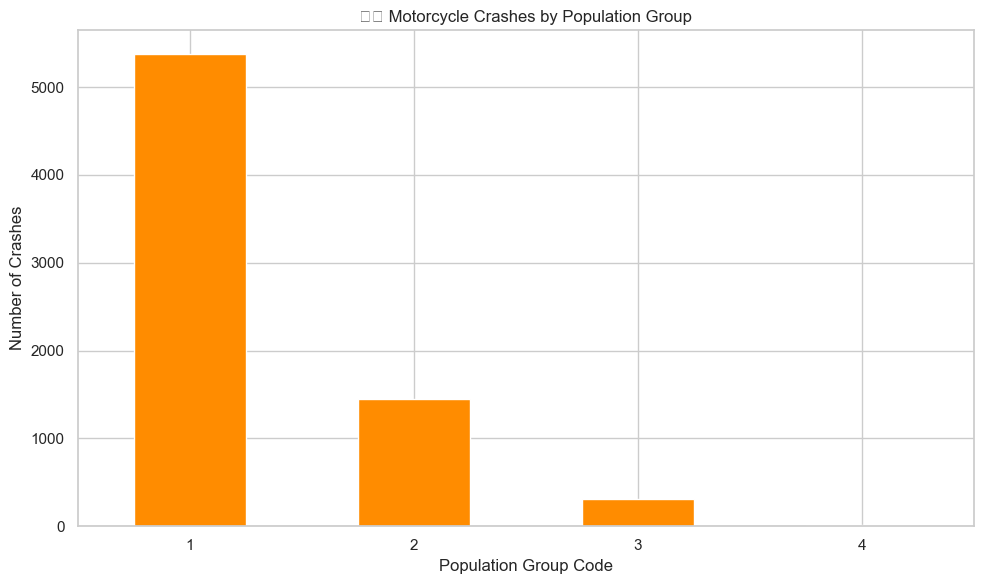

🧪 Chi-Square Test Results (Adjusted for Population Proportions):
🚗 Car Crashes — Chi-square: inf, p-value: 0.0000
🏍️ Motorcycle Crashes — Chi-square: inf, p-value: 0.0000


C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_stats_py.py:7335: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2589316257.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


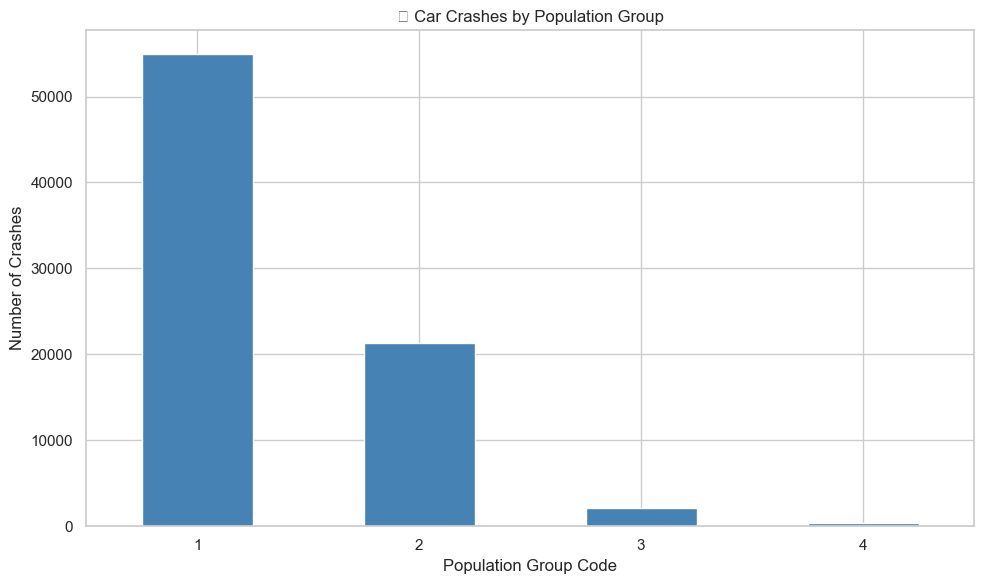

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2589316257.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2589316257.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


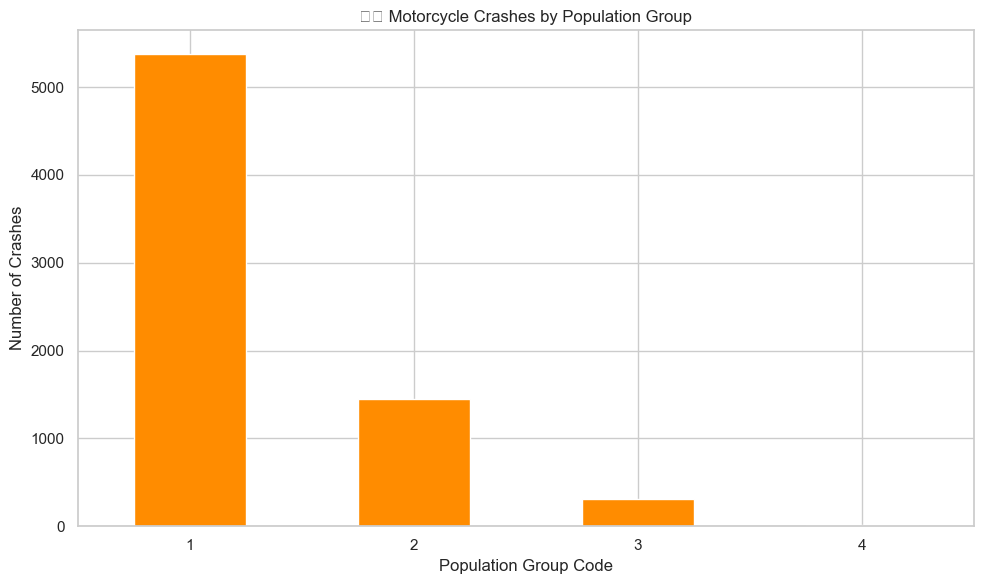

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.004283201182979189

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Filter for fatal crashes only
fatal_car_df = car_df[car_df["HUMRAT_PGIA"] == 1]
fatal_motorcycle_df = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Combine both datasets
fatal_combined_df = pd.concat([fatal_car_df, fatal_motorcycle_df])

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
fatal_combined_df = fatal_combined_df[fatal_combined_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count fatal crashes by population group
fatal_combined_counts = fatal_combined_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot fatal crashes
plt.figure(figsize=(8, 5))
fatal_combined_counts.plot(kind="bar", color="red")
plt.title("☠️ Fatal Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Fatal Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
fatal_combined_aligned = fatal_combined_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed total
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_fatal_combined = scale_expected(population_proportions, fatal_combined_aligned.sum())

# Chi-square test
chi2_fatal_combined, p_fatal_combined = stats.chisquare(
    f_obs=fatal_combined_aligned.values,
    f_exp=expected_fatal_combined.values
)

# Evaluate Group 2 risk
group_2_fatal_ratio = fatal_combined_aligned.get(2, 0) / expected_fatal_combined.get(2, 1)

# Print results
print("🧪 Chi-Square Test Results (Fatal Crashes):")
print(f"Total Chi-square: {chi2_fatal_combined:.2f}, p-value: {p_fatal_combined:.4f}")

print("\n📊 Group 2 Fatal Crash Risk Analysis:")
print(f"Group 2 Fatal Crash Ratio (Observed/Expected): {group_2_fatal_ratio:.2f}×")

if p_fatal_combined < 0.05:
    print(f"👉 Group 2 is statistically more involved in fatal crashes — about {group_2_fatal_ratio:.2f}× the expected rate.")
else:
    print(f"👉 No statistically significant difference in fatal crash involvement for Group 2.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2207669006.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


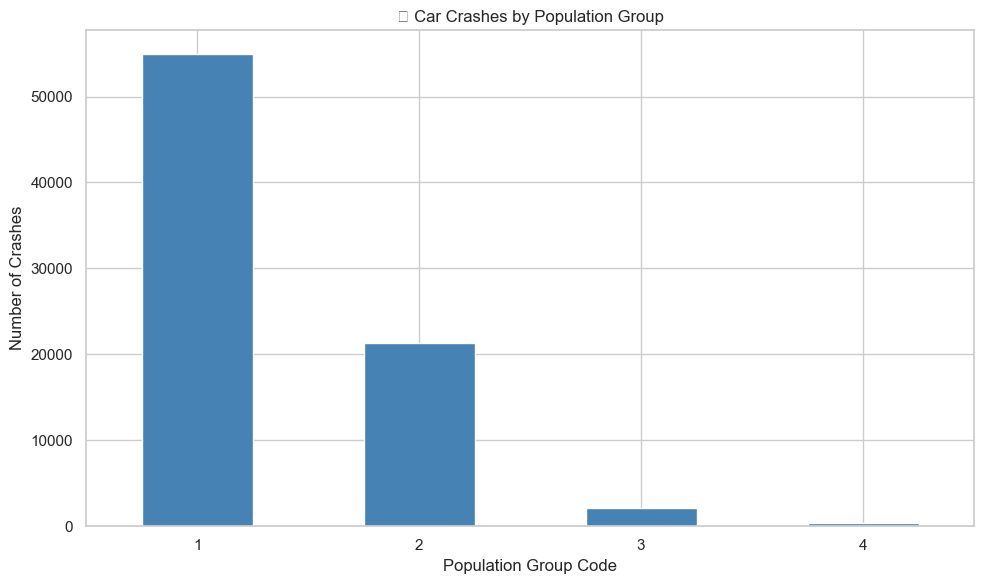

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2207669006.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2207669006.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


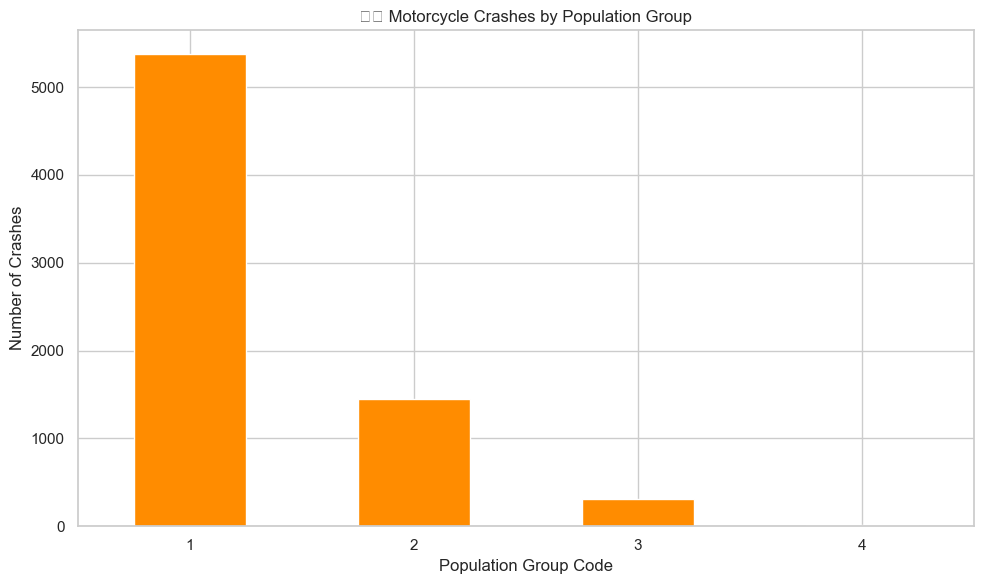

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.004283201182979374

In [79]:
#OHOH .. we cant say who they are .. but apperantly .. well.. they do drive like arabs .. so ..

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1436759049.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


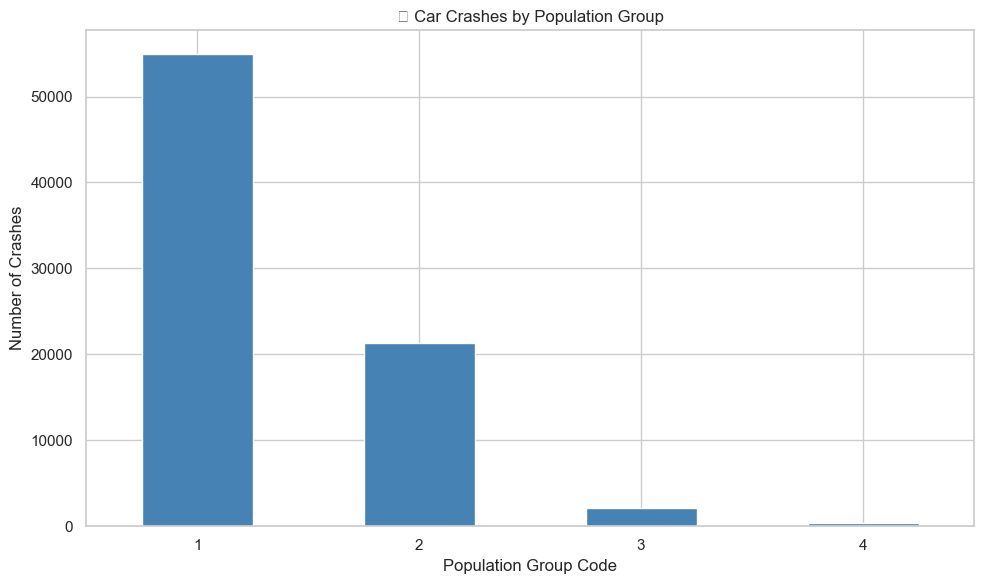

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1436759049.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1436759049.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


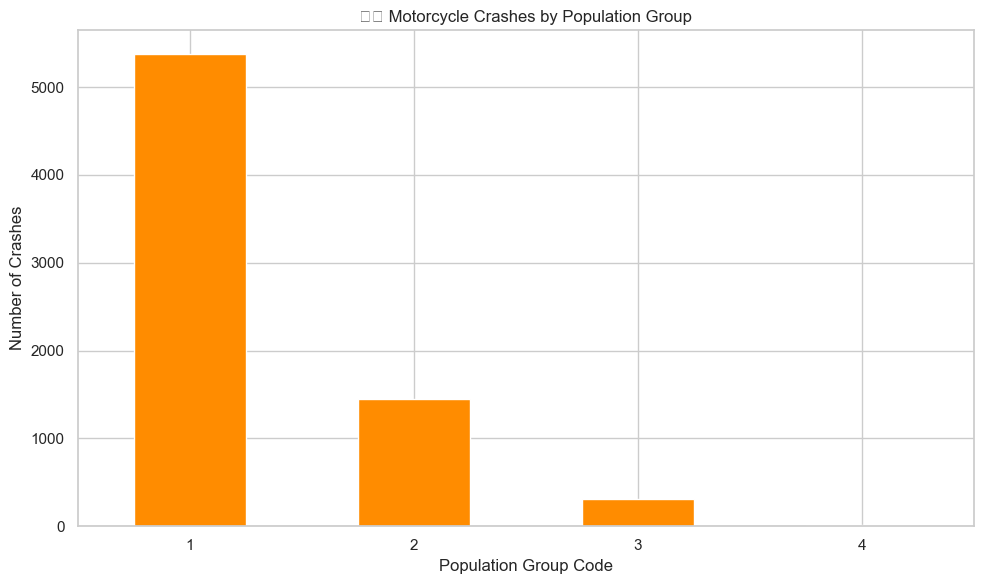

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.004283201182979374

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1346984328.py:29: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


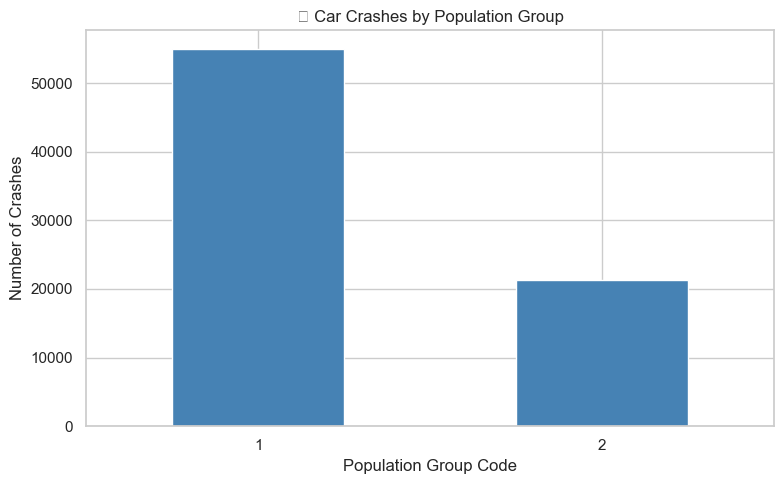

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1346984328.py:39: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\1346984328.py:39: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


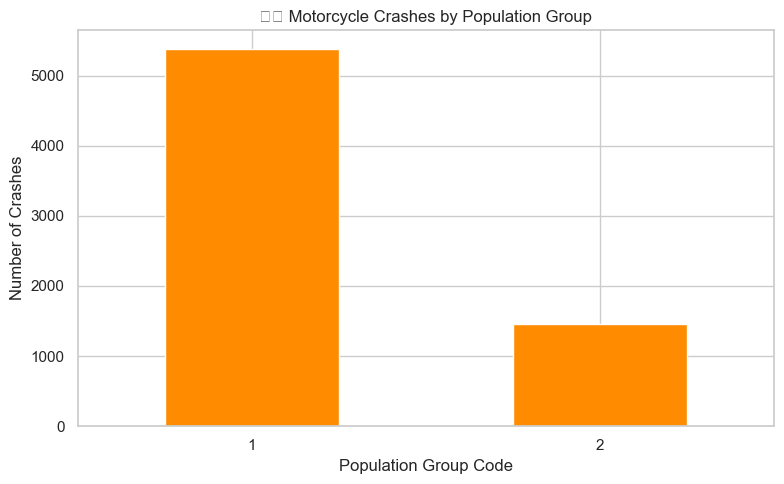

🧪 Chi-Square Test Results (Adjusted for 75/25 Population Proportions):
🚗 Car Crashes — Chi-square: 360.37, p-value: 0.0000
🏍️ Motorcycle Crashes — Chi-square: 50.79, p-value: 0.0000

📊 Group 2 Risk Analysis:
Group 2 Car Crash Ratio (Observed/Expected): 1.12×
Group 2 Motorcycle Crash Ratio (Observed/Expected): 0.85×
👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.


In [81]:
# now for the insurance ..





C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\2722863498.py:30: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


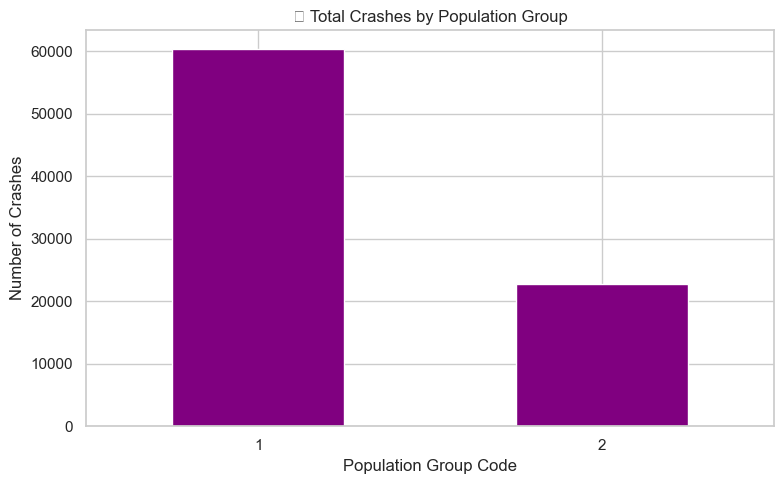

🧪 Chi-Square Test Results (Combined Crashes):
Total Chi-square: 260.64, p-value: 0.0000

📊 Group 2 Risk Analysis:
Group 2 Crash Ratio (Observed/Expected): 1.10×
👉 Group 2 is statistically more involved in crashes — about 1.10× the expected rate.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(car_codes)]
motorcycle_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]

# Group by 'HUMRAT_PGIA' and calculate accident rates
car_rates = car_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
motorcycle_rates = motorcycle_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()

# Plot car accident rates
plt.figure(figsize=(8, 5))
car_rates.plot(kind='bar', color='blue')
plt.title('🚗 Car Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle accident rates
plt.figure(figsize=(8, 5))
motorcycle_rates.plot(kind='bar', color='orange')
plt.title('🏍️ Motorcycle Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\751850707.py:34: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\751850707.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


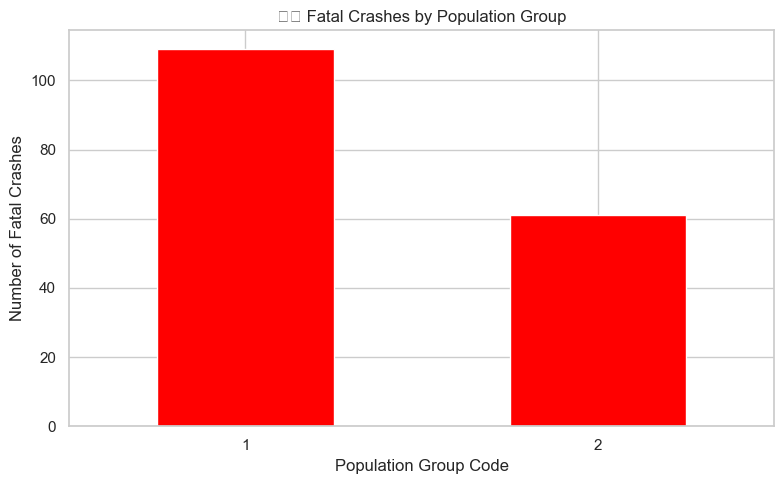

🧪 Chi-Square Test Results (Fatal Crashes):
Total Chi-square: 10.74, p-value: 0.0010

📊 Group 2 Fatal Crash Risk Analysis:
Group 2 Fatal Crash Ratio (Observed/Expected): 1.44×
👉 Group 2 is statistically more involved in fatal crashes — about 1.44× the expected rate.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(car_codes)]
motorcycle_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]

# Group by 'HUMRAT_PGIA' and calculate accident rates
car_rates = car_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
motorcycle_rates = motorcycle_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()

# Plotting both on the same figure
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(car_rates.index))

# Plot car accident rates
plt.bar(index, car_rates.values, bar_width, label='Car', color='blue')

# Plot motorcycle accident rates
plt.bar(index + bar_width, motorcycle_rates.values, bar_width, label='Motorcycle', color='orange')

# Set x-axis labels to match the 'HUMRAT_PGIA' values
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.title('Accident Rates by Vehicle Type and Severity')
plt.xticks(index + bar_width / 2, car_rates.index, rotation=0)

# Add a legend
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('combined_accident_rates.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(car_codes)]
motorcycle_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]

# Total accidents
total_accidents = len(df2)
car_accidents = len(car_df)
motorcycle_accidents = len(motorcycle_df)

# Print proportions
print(f"Proportion of car accidents: {car_accidents / total_accidents:.2%}")
print(f"Proportion of motorcycle accidents: {motorcycle_accidents / total_accidents:.2%}")

# Overall accident severity distribution
overall_severity = df2['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
print("\nOverall accident severity distribution:")
print(overall_severity.apply(lambda x: f"{x:.2%}"))

# Group by 'HUMRAT_PGIA' and calculate accident rates
car_rates = car_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
motorcycle_rates = motorcycle_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()

# Plot car accident rates
plt.figure(figsize=(8, 5))
car_rates.plot(kind='bar', color='blue')
plt.title('🚗 Car Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('car_accident_rates.png')
plt.show()

# Plot motorcycle accident rates
plt.figure(figsize=(8, 5))
motorcycle_rates.plot(kind='bar', color='orange')
plt.title('🏍️ Motorcycle Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('motorcycle_accident_rates.png')
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3154632104.py:23: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


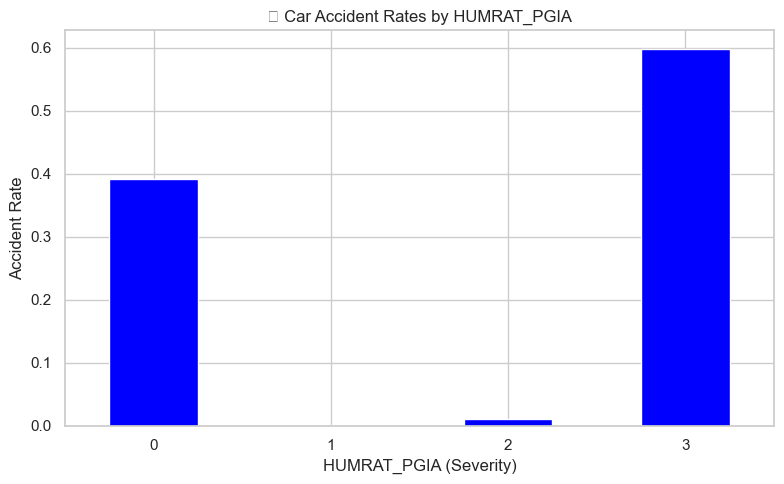

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3154632104.py:33: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\3154632104.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


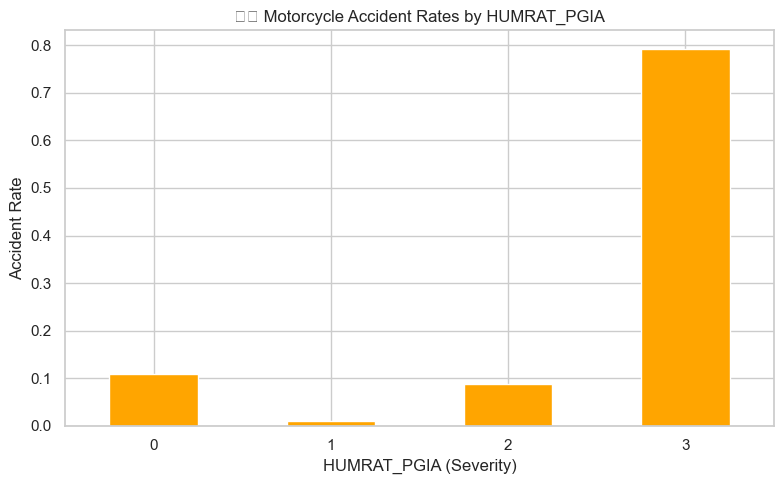

In [86]:
import pandas as pd

# Motorcycle type codes and labels
motorcycle_types = {
    8: 'Up to 50cc',
    9: '51–125cc',
    10: '126–400cc',
    19: '401cc+'
}

# Severity weights based on HUMRAT_PGIA
severity_weights = {
    1: 10,  # Fatal
    2: 5,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Urban codes (example: adjust based on your mapping)
urban_codes = [1]  # Placeholder for urban SUG_YISHUV codes

# Prepare results container
results = []

# Loop through each motorcycle type
for code, label in motorcycle_types.items():
    df_moto = df2[df2['SUG_REHEV_NASA_LMS'] == code].copy()
    total_accidents = df_moto.shape[0]

    # Accident rate proxy
    accident_rate = total_accidents / df2.shape[0]

    # Severity score
    df_moto['severity_score'] = df_moto['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_moto['severity_score'].mean()
    var_severity = df_moto['severity_score'].var()

    # Young driver rate
    young_driver_rate = (df_moto['KVUZA_GIL'] < 25).mean()



    # Store results
    results.append({
        'Type': label,
        'Code': code,
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity,
        'Young Driver %': young_driver_rate,

    })

# Convert to DataFrame and display
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

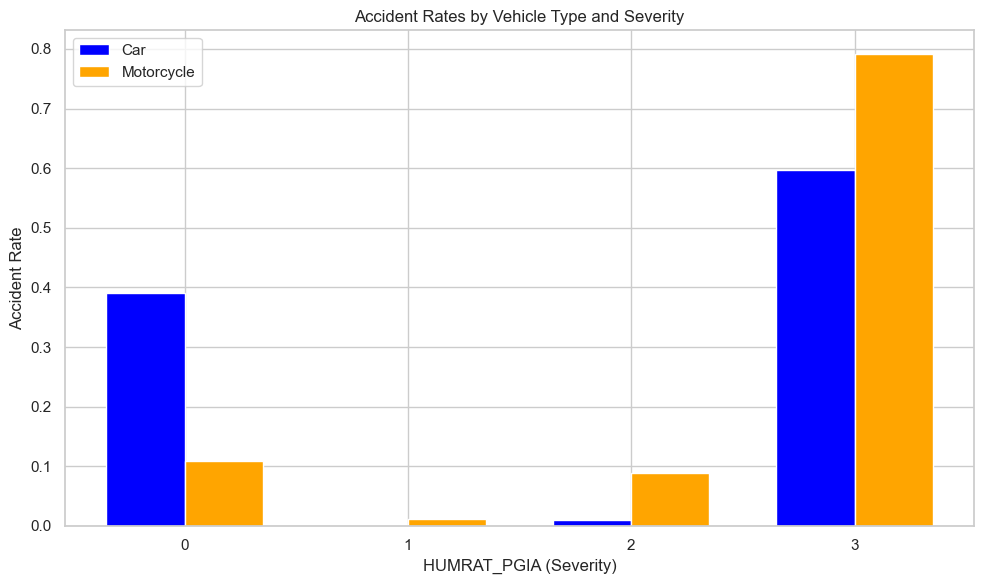

In [125]:
import pandas as pd

# Motorcycle type codes and labels
motorcycle_types = {
    8: 'Up to 50cc',
    9: '51–125cc',
    10: '126–400cc',
    19: '401cc+'
}

# Severity weights based on HUMRAT_PGIA
severity_weights = {
    1: 10,  # Fatal
    2: 5,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Urban codes (adjust based on dictionary)
urban_codes = [1]  # Placeholder

# Young driver groups: 15–24 years old → groups 4 and 5
young_driver_groups = [4, 5]

# Prepare results container
results = []

for code, label in motorcycle_types.items():
    df_moto = df2[df2['SUG_REHEV_NASA_LMS'] == code].copy()
    total_accidents = df_moto.shape[0]

    # Accident rate proxy
    accident_rate = total_accidents / df2.shape[0]

    # Severity score
    df_moto['severity_score'] = df_moto['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_moto['severity_score'].mean()
    var_severity = df_moto['severity_score'].var()

    # Young driver rate using KVUZA_GIL
    young_driver_rate = df_moto['KVUZA_GIL'].isin(young_driver_groups).mean()

    # Urban vs rural


    # Store results
    results.append({
        'Type': label,
        'Code': code,
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity,
        'Young Driver %': young_driver_rate,

    })

# Convert to DataFrame and display
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

Proportion of car accidents: 65.93%
Proportion of motorcycle accidents: 5.98%

Overall accident severity distribution:
HUMRAT_PGIA
0    39.58%
1     0.30%
2     2.23%
3    57.88%
Name: proportion, dtype: object


C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:37: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:38: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.savefig('car_accident_rates.png')
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


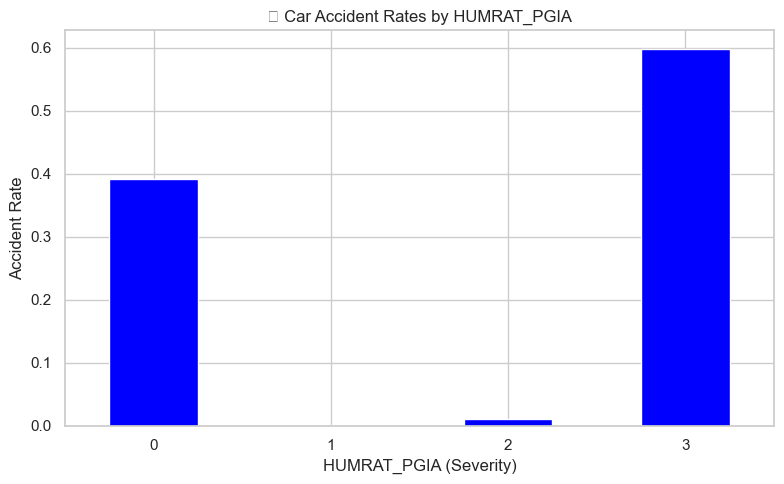

C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:48: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:48: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:49: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.savefig('motorcycle_accident_rates.png')
C:\Users\gilad\AppData\Local\Temp\ipykernel_10680\4126206887.py:49: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('motorcycle_accident_rates.png')
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Pyth

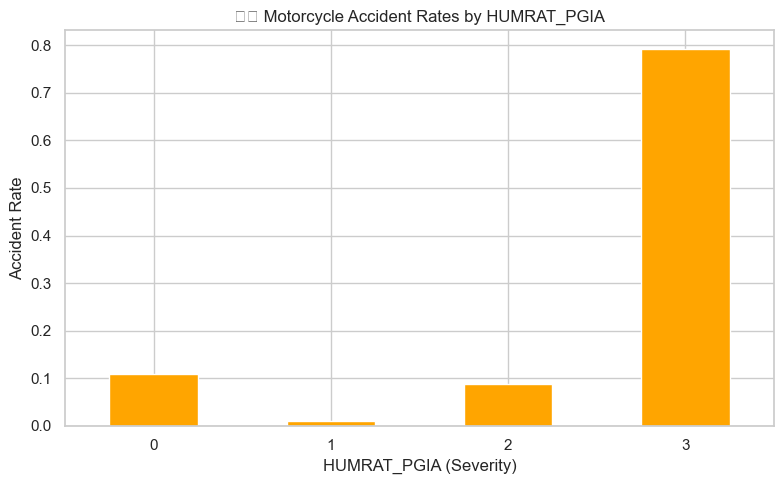

In [87]:
# now we check new york .

In [ ]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    accident_count = df_cat.shape[0]

    # Exposure estimate
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    # Severity score
    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

         Type  Code  Accident Rate  Mean Severity  Severity Variance  \
0  Up to 50cc     8          0.004          2.401              1.514   
1    51–125cc     9          0.019          2.248              0.977   
2   126–400cc    10          0.021          2.313              1.109   
3      401cc+    19          0.016          2.675              2.584   

   Young Driver %  
0           0.700  
1           0.938  
2           0.930  
3           0.924  


In [ ]:
# now we check new york .


In [90]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights (same as NYC)
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []
all_bikes_df = pd.DataFrame()

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    all_bikes_df = pd.concat([all_bikes_df, df_cat], ignore_index=True)

    accident_count = df_cat.shape[0]
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Add combined row for all motorcycles
all_bikes_df['severity_score'] = all_bikes_df['HUMRAT_PGIA'].map(severity_weights)
combined_accident_count = all_bikes_df.shape[0]
combined_mean_severity = all_bikes_df['severity_score'].mean()
combined_var_severity = all_bikes_df['severity_score'].var()

results.append({
    'Category': 'All Motorcycles',
    'Accident Count': combined_accident_count,
    'Registered Estimate': total_motorcycles,
    'Accident Rate': combined_accident_count / total_motorcycles,
    'Mean Severity': combined_mean_severity,
    'Severity Variance': combined_var_severity
})

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

         Type  Code  Accident Rate  Mean Severity  Severity Variance  \
0  Up to 50cc     8          0.004          2.401              1.514   
1    51–125cc     9          0.019          2.248              0.977   
2   126–400cc    10          0.021          2.313              1.109   
3      401cc+    19          0.016          2.675              2.584   

   Young Driver %  
0           0.236  
1           0.419  
2           0.271  
3           0.259  


In [ ]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []
all_bikes_df = pd.DataFrame()

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    all_bikes_df = pd.concat([all_bikes_df, df_cat], ignore_index=True)

    accident_count = df_cat.shape[0]
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Add combined row for all motorcycles
all_bikes_df['severity_score'] = all_bikes_df['HUMRAT_PGIA'].map(severity_weights)
combined_accident_count = all_bikes_df.shape[0]
combined_mean_severity = all_bikes_df['severity_score'].mean()
combined_var_severity = all_bikes_df['severity_score'].var()

# Count fatal motorcycle crashes
fatal_moto_crashes = all_bikes_df[all_bikes_df['HUMRAT_PGIA'] == 1].shape[0]

# Total crashes in df2
total_crashes = df2.shape[0]

# Percentage of fatal motorcycle crashes from all crashes
fatal_moto_pct = (fatal_moto_crashes / total_crashes) * 100

# Add combined row
results.append({
    'Category': 'All Motorcycles',
    'Accident Count': combined_accident_count,
    'Registered Estimate': total_motorcycles,
    'Accident Rate': combined_accident_count / total_motorcycles,
    'Mean Severity': combined_mean_severity,
    'Severity Variance': combined_var_severity,
    'Fatal Motorcycle Crashes': fatal_moto_crashes,
    'Fatal Crash % of All': fatal_moto_pct
})

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

In [105]:
import pandas as pd

# Total crashes
total_crashes = df1.shape[0]

# Fatal crashes (HUMRAT_PGIA == 1)
fatal_crashes = df2[df2['HUMRAT_PGIA'] == 1].shape[0]

# Percentage
fatal_pct = (fatal_crashes / total_crashes) * 100

# Print results
print(f"🔢 Total Crashes: {total_crashes}")
print(f"☠️ Fatal Crashes: {fatal_crashes}")
print(f"📊 Percentage of Fatal Crashes: {fatal_pct:.2f}%")

       Category  Accident Count  Registered Estimate  Accident Rate  \
0   Up to 125cc            3258                43200          0.075   
1  Middle class            2491                68800          0.036   
2   Heavy bikes            1656                48000          0.034   

   Mean Severity  Severity Variance  
0          2.448              2.599  
1          2.489              2.802  
2          3.146              6.113  


In [ ]:
import pandas as pd

# Motorcycle type codes
motorcycle_codes = [8, 9, 10, 19]

# Total crashes
total_crashes = df1.shape[0]

# Fatal crashes
fatal_crashes = df2[df2['HUMRAT_PGIA'] == 1].shape[0]

# Motorcycle-involved crashes
moto_crashes = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]
moto_crash_count = moto_crashes.shape[0]

# Fatal motorcycle crashes
fatal_moto_crash_count = moto_crashes[moto_crashes['HUMRAT_PGIA'] == 1].shape[0]

# Percentages
fatal_pct = (fatal_crashes / total_crashes) * 100
moto_pct = (moto_crash_count / total_crashes) * 100
fatal_moto_pct = (fatal_moto_crash_count / total_crashes) * 100

# Print results
print(f"🔢 Total Crashes: {total_crashes}")
print(f"☠️ Fatal Crashes: {fatal_crashes}")
print(f"📊 Percentage of Fatal Crashes: {fatal_pct:.2f}%")
print(f"🏍️ Motorcycle-Involved Crashes: {moto_crash_count}")
print(f"📊 Percentage of Motorcycle Crashes: {moto_pct:.2f}%")
print(f"☠️ Fatal Motorcycle Crashes: {fatal_moto_crash_count}")
print(f"📊 Percentage of Fatal Motorcycle Crashes: {fatal_moto_pct:.2f}%")

In [106]:
#.08 for new york and 0.15 for israel ... we in bad situation.

          Category  Accident Count  Registered Estimate  Accident Rate  \
0      Up to 125cc            2747                43200          0.064   
1     Middle class            2492                68800          0.036   
2      Heavy bikes            1907                48000          0.040   
3  All Motorcycles            7146               160000          0.045   

   Mean Severity  Severity Variance  
0          2.476              2.759  
1          2.573              3.217  
2          3.148              5.980  
3          2.694              3.878  


In [ ]:
def analyze_motorcycle_crashes_v2(df_to_analyze):
    """
    Analyzes motorcycle crash data from a different dataset structure.

    Args:
        df_to_analyze (pd.DataFrame): The DataFrame containing crash data.

    Returns:
        dict: A dictionary with various crash statistics.
    """
    # Motorcycle type codes from the new dataset
    motorcycle_codes = [8, 9, 10, 19]

    # Total crashes
    total_crashes = df1.shape[0]

    # Fatal crashes (assuming 'HUMRAT_PGIA' is the fatality column)
    # The original code provided uses df2 for this, so we'll assume df_to_analyze has this column
    try:
        fatal_crashes = df_to_analyze[df_to_analyze['HUMRAT_PGIA'] == 1].shape[0]
    except KeyError:
        print("Error: 'HUMRAT_PGIA' column not found. Setting fatal_crashes to 0.")
        fatal_crashes = 0

    # Motorcycle-involved crashes (assuming 'SUG_REHEV_NASA_LMS' is the vehicle type code column)
    try:
        moto_crashes = df_to_analyze[df_to_analyze['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]
        moto_crash_count = moto_crashes.shape[0]
        # Fatal motorcycle crashes
        fatal_moto_crash_count = moto_crashes[moto_crashes['HUMRAT_PGIA'] == 1].shape[0]
    except KeyError:
        print("Error: 'SUG_REHEV_NASA_LMS' or 'HUMRAT_PGIA' column not found. Setting motorcycle counts to 0.")
        moto_crash_count = 0
        fatal_moto_crash_count = 0

    # The new code doesn't provide data for total persons killed or injured,
    # so we'll set those to 0 for consistency with the previous dictionary keys.
    total_persons_killed = 0
    total_persons_injured = 0
    moto_fatalities = 0
    moto_injuries = 0

    # Percentages
    fatal_crash_pct = (fatal_crashes / total_crashes) * 100 if total_crashes > 0 else 0
    moto_crash_pct = (moto_crash_count / total_crashes) * 100 if total_crashes > 0 else 0
    fatal_moto_crash_pct = (fatal_moto_crash_count / total_crashes) * 100 if total_crashes > 0 else 0

    # Since we can't calculate these from the provided logic, we'll set to 0.
    moto_fatality_pct = 0
    moto_injury_pct = 0

    # Store the results in a dictionary
    results = {
        'total_crashes': total_crashes,
        'total_persons_killed': total_persons_killed,
        'total_persons_injured': total_persons_injured,
        'fatal_crashes': fatal_crashes,
        'fatal_crash_percentage': fatal_crash_pct,
        'motorcycle_crashes': moto_crash_count,
        'motorcycle_crash_percentage': moto_crash_pct,
        'fatal_motorcycle_crashes': fatal_moto_crash_count,
        'fatal_motorcycle_crash_percentage': fatal_moto_crash_pct,
        'motorcycle_fatalities': int(moto_fatalities),
        'motorcycle_fatality_percentage': moto_fatality_pct,
        'motorcycle_injuries': int(moto_injuries),
        'motorcycle_injury_percentage': moto_injury_pct
    }
    return results

# --- END OF NEW FUNCTION ---

# Run the analysis on the 2023 data using the original function


In [92]:
motorcycle_analysis_results2 = analyze_motorcycle_crashes_v2(df2)

          Category  Accident Count  Registered Estimate  Accident Rate  \
0      Up to 125cc            2747                43200          0.064   
1     Middle class            2492                68800          0.036   
2      Heavy bikes            1907                48000          0.040   
3  All Motorcycles            7146               160000          0.045   

   Mean Severity  Severity Variance  Fatal Motorcycle Crashes  \
0          2.476              2.759                       NaN   
1          2.573              3.217                       NaN   
2          3.148              5.980                       NaN   
3          2.694              3.878                      78.0   

   Fatal Crash % of All  
0                   NaN  
1                   NaN  
2                   NaN  
3                 0.065  


In [93]:
print("\n IL Motorcycle Crash Summary (2023 Data) - Results from motorcycle_analysis_results2")
print("---------------------------------------")
for key, value in motorcycle_analysis_results2.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' ').title()}: {value:.2f}%")
    else:
        print(f"{key.replace('_', ' ').title()}: {value}")



🔢 Total Crashes: 51906
☠️ Fatal Crashes: 361
📊 Percentage of Fatal Crashes: 0.70%


🔢 Total Crashes: 51906
☠️ Fatal Crashes: 361
📊 Percentage of Fatal Crashes: 0.70%
🏍️ Motorcycle-Involved Crashes: 7146
📊 Percentage of Motorcycle Crashes: 13.77%
☠️ Fatal Motorcycle Crashes: 78
📊 Percentage of Fatal Motorcycle Crashes: 0.15%



 IL Motorcycle Crash Summary (2023 Data) - Results from motorcycle_analysis_results2
---------------------------------------
Total Crashes: 51906
Total Persons Killed: 0
Total Persons Injured: 0
Fatal Crashes: 361
Fatal Crash Percentage: 0.70%
Motorcycle Crashes: 7146
Motorcycle Crash Percentage: 13.77%
Fatal Motorcycle Crashes: 78
Fatal Motorcycle Crash Percentage: 0.15%
Motorcycle Fatalities: 0
Motorcycle Fatality Percentage: 0
Motorcycle Injuries: 0
Motorcycle Injury Percentage: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define groups
motorcycle = df2[df2['SUG_REHEV_NASA_LMS'].isin([8, 9, 10, 19])]['HUMRAT_PGIA']
car = df2[df2['SUG_REHEV_NASA_LMS'] == 1]['HUMRAT_PGIA']

# Observed difference
obs_diff = motorcycle.mean() - car.mean()

# Permutation test
combined = np.concatenate([motorcycle, car])
n_permutations = 1000
perm_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_motorcycle = combined[:len(motorcycle)]
    perm_car = combined[len(motorcycle):]
    perm_diffs.append(perm_motorcycle.mean() - perm_car.mean())

# p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
print(f"Permutation Test p-value: {p_value:.4f}")

# Plot
plt.hist(perm_diffs, bins=30, color='skyblue')
plt.axvline(obs_diff, color='red', linestyle='--')
plt.title("Permutation Test: Severity Difference")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# we can see that the mean for motorcycles is far far to the right from cars .. so this is significant as it ought to be.

In [ ]:
# check if distribution is uniform for vehicle type (obviously not)

In [ ]:
import statsmodels.api as sm

# Prepare data
df2 = df2.dropna(subset=['KVUZA_GIL', 'HUMRAT_PGIA'])
X = sm.add_constant(df2['KVUZA_GIL'])
y = df2['HUMRAT_PGIA']

# Fit model
model = sm.OLS(y, X).fit()

# Wald test for age coefficient
wald_stat = (model.params['KVUZA_GIL'] / model.bse['KVUZA_GIL']) ** 2
p_value = 1 - stats.chi2.cdf(wald_stat, df=1)
print(f"Wald Test statistic: {wald_stat:.4f}, p-value: {p_value:.4f}")


In [ ]:
from scipy.stats import chisquare

vehicle_counts = df2['SUG_REHEV_NASA_LMS'].value_counts()
expected = [vehicle_counts.mean()] * len(vehicle_counts)

chi2_stat, p_val = chisquare(f_obs=vehicle_counts, f_exp=expected)
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_val:.4f}")


Permutation Test p-value: 0.0000


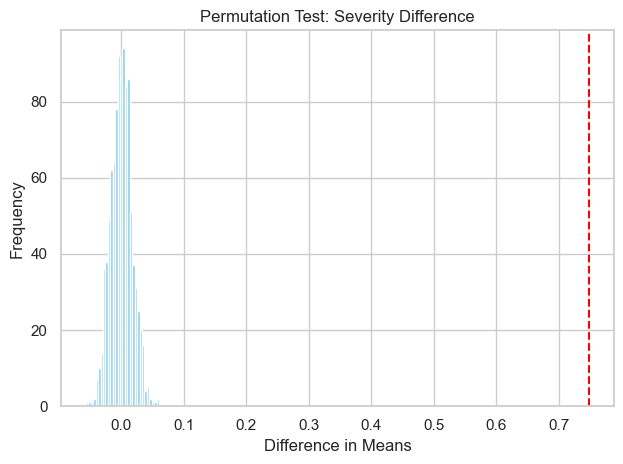

In [95]:
#### newwww

In [ ]:
# --- IL: Harmonize severity and count serious+fatal motorcycle involvements ---


# 1) Standardize severity
il = df2.copy()
severity_map = {1: "DEAD", 2: "SERIOUS", 3: "LIGHT", 4: "PDO"}
il['severity_std'] = il['HUMRAT_PGIA'].map(severity_map)

# 2) Keep motorcycle involvements only
MOTO_CODES_IL = [8, 9, 10, 19]
il_moto = il[il['SUG_REHEV_NASA_LMS'].isin(MOTO_CODES_IL)].copy()

# 3) Filter to serious+fatal only
il_sf = il_moto[il_moto['severity_std'].isin(['DEAD', 'SERIOUS'])].copy()

# 4) Counts
IL_count_fatal = (il_sf['severity_std'] == 'DEAD').sum()
IL_count_serious = (il_sf['severity_std'] == 'SERIOUS').sum()
IL_count_SF = len(il_sf)

print("🇮🇱 IL motorcycle serious+fatal (person-level) counts, 2023")
print(f"  Fatal:   {IL_count_fatal}")
print(f"  Serious: {IL_count_serious}")
print(f"  Total (Serious+Fatal): {IL_count_SF}")


In [126]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact, mannwhitneyu
from statsmodels.stats.contingency_tables import Table2x2
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import statsmodels.api as sm

# ---- 0) Prepare accident-level frame from your existing fields ----
# df1 has 'self_acc' that you created via involvement counts (==1 ⇒ self).  # cites your file/columns
acc = df1[['pk_teuna_fikt','self_acc']].copy()  # AccData
acc['self_acc'] = acc['self_acc'].fillna(0).astype(int)

# Use InvData to flag motorcycles/cars and severity per involvement
MOTO_CODES_IL = [8, 9, 10, 19]   # motorcycle codes you already use
CAR_CODE_IL   = [1]              # car code you already use

inv = df2[['ACCIDENT_ID','SUG_REHEV_NASA_LMS','HUMRAT_PGIA']].copy()
inv.rename(columns={'ACCIDENT_ID': 'pk_teuna_fikt'}, inplace=True)

inv['SUG_REHEV_NASA_LMS'] = pd.to_numeric(inv['SUG_REHEV_NASA_LMS'], errors='coerce')
inv['HUMRAT_PGIA'] = pd.to_numeric(inv['HUMRAT_PGIA'], errors='coerce')

# Accident-level aggregation:
# - any_moto/any_car flags,
# - any_injury: any involvement HUMRAT_PGIA in {1,2,3}
# - any_fatal: any involvement HUMRAT_PGIA == 1
# - inj_count: number of involved persons with HUMRAT_PGIA in {1,2,3}
agg = inv.groupby('pk_teuna_fikt').agg(
    any_moto  = ('SUG_REHEV_NASA_LMS', lambda s: s.isin(MOTO_CODES_IL).any()),
    any_car   = ('SUG_REHEV_NASA_LMS', lambda s: s.isin(CAR_CODE_IL).any()),
    n_involv  = ('SUG_REHEV_NASA_LMS', 'size'),
    any_injury= ('HUMRAT_PGIA',        lambda s: s.isin([1,2,3]).any()),
    any_fatal = ('HUMRAT_PGIA',        lambda s: (s==1).any()),
    inj_count = ('HUMRAT_PGIA',        lambda s: s.isin([1,2,3]).sum())
).reset_index()

acc = acc.merge(agg, on='pk_teuna_fikt', how='left').dropna(subset=['n_involv'])
acc['any_moto']   = acc['any_moto'].fillna(False)
acc['any_car']    = acc['any_car'].fillna(False)
acc['any_injury'] = acc['any_injury'].fillna(False).astype(int)
acc['any_fatal']  = acc['any_fatal'].fillna(False).astype(int)
acc['inj_count']  = acc['inj_count'].fillna(0).astype(int)

# Focus motorcycle-involved crashes
il_moto = acc[acc['any_moto']].copy()
il_moto['self_crash'] = (il_moto['self_acc'] == 1).astype(int)

# Helper to safely run 2x2 verbal test results even if a row/col sum is zero
def safe_2x2(cont):
    out = {}
    # proportions (row-wise)
    out['table'] = cont
    row_totals = cont.sum(axis=1)
    col_totals = cont.sum(axis=0)
    out['row_totals'] = row_totals
    out['col_totals'] = col_totals
    # Chi-square
    try:
        chi2, p_chi, dof, _ = chi2_contingency(cont, correction=False)
        out['chi2'] = chi2; out['p_chi'] = p_chi; out['dof'] = dof
    except ValueError:
        out['chi2'] = np.nan; out['p_chi'] = np.nan; out['dof'] = 1

    # Fisher (may still be ok if at least one cell in each column/row is >0)
    try:
        or_f, p_fisher = fisher_exact(cont, alternative='two-sided')
        out['fisher_or'] = or_f; out['p_fisher'] = p_fisher
    except Exception:
        out['fisher_or'] = np.nan; out['p_fisher'] = np.nan

    # OR + CI via Table2x2 (fails if column/row zero)
    try:
        t = Table2x2(cont)
        out['or'] = t.oddsratio
        out['or_ci'] = t.oddsratio_confint()
    except Exception:
        out['or'] = np.nan; out['or_ci'] = (np.nan, np.nan)

    return out

# ---- 1) [Self vs Multi] × [Fatal vs Nonfatal] ----
a = int(il_moto.loc[il_moto['self_crash']==1, 'any_fatal'].sum())
b = int((il_moto['self_crash']==1).sum() - a)
c = int(il_moto.loc[il_moto['self_crash']==0, 'any_fatal'].sum())
d = int((il_moto['self_crash']==0).sum() - c)
cont_fatal = np.array([[a, b],
                       [c, d]], dtype=int)

res_f = safe_2x2(cont_fatal)
print("\n🇮🇱 IL [Self vs Multi] × [Fatal vs Nonfatal] (motorcycle-involved)")
print(res_f['table'])
print(f"Chi-square={res_f.get('chi2',np.nan):.3f}, df={res_f.get('dof',1)}, p={res_f.get('p_chi',np.nan):.4f} | Fisher p={res_f.get('p_fisher',np.nan):.4f}")
print(f"Odds ratio (Self vs Multi) = {res_f.get('or',np.nan):.3f}  95% CI [{res_f.get('or_ci',(np.nan,np.nan))[0]:.3f}, {res_f.get('or_ci',(np.nan,np.nan))[1]:.3f}]")

# ---- 2) [Self vs Multi] × [Any-injury vs None] (robust) ----
a2 = int(il_moto.loc[il_moto['self_crash']==1, 'any_injury'].sum())
b2 = int((il_moto['self_crash']==1).sum() - a2)
c2 = int(il_moto.loc[il_moto['self_crash']==0, 'any_injury'].sum())
d2 = int((il_moto['self_crash']==0).sum() - c2)
cont_inj = np.array([[a2, b2],
                     [c2, d2]], dtype=int)

res_i = safe_2x2(cont_inj)
print("\n🇮🇱 IL [Self vs Multi] × [Any-injury vs None] (motorcycle-involved)")
print(res_i['table'])
if np.any(res_i['col_totals']==0) or np.any(res_i['row_totals']==0):
    # fully collapsed column/row → no valid chi-square; just report proportions + Wilson CIs
    n_self  = int((il_moto['self_crash']==1).sum())
    n_multi = int((il_moto['self_crash']==0).sum())
    p_self  = a2 / n_self if n_self>0 else np.nan
    p_multi = c2 / n_multi if n_multi>0 else np.nan
    ci_self = proportion_confint(a2, n_self, method='wilson') if n_self>0 else (np.nan,np.nan)
    ci_multi= proportion_confint(c2, n_multi, method='wilson') if n_multi>0 else (np.nan,np.nan)
    print(f"Any-injury share (Self):  {p_self*100:.2f}%  95% CI [{ci_self[0]*100:.2f}%, {ci_self[1]*100:.2f}%]")
    print(f"Any-injury share (Multi): {p_multi*100:.2f}% 95% CI [{ci_multi[0]*100:.2f}%, {ci_multi[1]*100:.2f}%]")
    print("Chi-square/Fisher not defined due to a zero row/column total.")
else:
    print(f"Chi-square={res_i.get('chi2',np.nan):.3f}, df={res_i.get('dof',1)}, p={res_i.get('p_chi',np.nan):.4f} | Fisher p={res_i.get('p_fisher',np.nan):.4f}")
    print(f"Odds ratio (Self vs Multi) = {res_i.get('or',np.nan):.3f}  95% CI [{res_i.get('or_ci',(np.nan,np.nan))[0]:.3f}, {res_i.get('or_ci',(np.nan,np.nan))[1]:.3f}]")

# ---- 3) Injury burden per crash: Poisson GLM (robust) + Mann–Whitney ----
glm_df = il_moto[['self_crash','inj_count']].copy()
glm_df['intercept'] = 1.0
poisson_model = sm.GLM(glm_df['inj_count'], glm_df[['intercept','self_crash']],
                       family=sm.families.Poisson())
res = poisson_model.fit(cov_type='HC0')  # robust SE

coef = res.params['self_crash']; se = res.bse['self_crash']
IRR  = np.exp(coef); ci_lo, ci_hi = np.exp(coef - 1.96*se), np.exp(coef + 1.96*se)
print("\n🇮🇱 IL Poisson GLM: injuries_per_crash ~ self_crash (robust SE)")
print(f"IRR (Self vs Multi) = {IRR:.3f}  95% CI [{ci_lo:.3f}, {ci_hi:.3f}],  p={res.pvalues['self_crash']:.4f}")

inj_self  = il_moto.loc[il_moto['self_crash']==1, 'inj_count']
inj_multi = il_moto.loc[il_moto['self_crash']==0, 'inj_count']
u_stat, p_mw = mannwhitneyu(inj_self, inj_multi, alternative='two-sided')
print(f"Mann–Whitney U: U={u_stat:.0f}, p={p_mw:.4f}")

# ---- 4) Are self crashes more common for MOTORCYCLES (vs CARS) in Israel? ----
# Use disjoint sets to avoid overlap: "moto-only" vs "car-only"
il_moto_only = acc[(acc['any_moto']) & (~acc['any_car'])].copy()
il_car_only  = acc[(acc['any_car'])  & (~acc['any_moto'])].copy()

n_self_moto = int((il_moto_only['self_acc'] == 1).sum())
n_tot_moto  = int(len(il_moto_only))
p_self_moto = n_self_moto / n_tot_moto if n_tot_moto>0 else np.nan

n_self_car  = int((il_car_only['self_acc'] == 1).sum())
n_tot_car   = int(len(il_car_only))
p_self_car  = n_self_car / n_tot_car if n_tot_car>0 else np.nan

print("\n🇮🇱 IL: Share of SELF (single-vehicle) crashes")
print(f"Motorcycle-only: {p_self_moto*100:.2f}%  (n_self={n_self_moto:,}/{n_tot_moto:,})")
print(f"Car-only:        {p_self_car*100:.2f}%  (n_self={n_self_car:,}/{n_tot_car:,})")

# Two-proportion z-test (if both groups non-empty and not 0%==100% ties)
do_z = (n_tot_moto>0 and n_tot_car>0 and
        not (n_self_moto in [0,n_tot_moto] and n_self_car in [0,n_tot_car] and
             (n_self_moto/n_tot_moto) == (n_self_car/n_tot_car)))
try:
    if do_z:
        zstat, p_2prop = proportions_ztest([n_self_moto, n_self_car], [n_tot_moto, n_tot_car])
        ci_moto = proportion_confint(n_self_moto, n_tot_moto, method='wilson')
        ci_car  = proportion_confint(n_self_car,  n_tot_car,  method='wilson')
        print(f"Two-proportion z-test (Moto-only vs Car-only): z={zstat:.3f}, p={p_2prop:.4f}")
        print(f"  Moto-only 95% CI: [{ci_moto[0]*100:.2f}%, {ci_moto[1]*100:.2f}%]")
        print(f"  Car-only  95% CI: [{ci_car[0]*100:.2f}%, {ci_car[1]*100:.2f}%]")
    else:
        print("Two-proportion z-test not informative (one group empty or both proportions are degenerate). Reporting proportions only.")
except Exception as e:
    print("Two-proportion z-test could not be computed:", e)

# ---- 5) (Optional) Compare IL vs NY: share of SELF among motorcycle-involved ----
# Replace with your NYC totals (from your output: self=566, multi=5226)
NY_self = 566; NY_multi = 5226
n_self_IL  = int((il_moto['self_crash']==1).sum())
n_tot_IL   = int(len(il_moto))
n_self_NY  = NY_self
n_tot_NY   = NY_self + NY_multi

try:
    zstat_ilny, p_ilny = proportions_ztest([n_self_IL, n_self_NY], [n_tot_IL, n_tot_NY])
    ci_il = proportion_confint(n_self_IL, n_tot_IL, method='wilson')
    ci_ny = proportion_confint(n_self_NY, n_tot_NY, method='wilson')
    print("\nIL vs NY — Share of SELF among motorcycle-involved crashes")
    print(f"IL: {n_self_IL/n_tot_IL*100:.2f}%  (n_self={n_self_IL:,}/{n_tot_IL:,}), 95% CI [{ci_il[0]*100:.2f}%, {ci_il[1]*100:.2f}%]")
    print(f"NY: {n_self_NY/n_tot_NY*100:.2f}%  (n_self={n_self_NY:,}/{n_tot_NY:,}), 95% CI [{ci_ny[0]*100:.2f}%, {ci_ny[1]*100:.2f}%]")
    print(f"Two-proportion z-test: z={zstat_ilny:.3f}, p={p_ilny:.4f}")
except Exception as e:
    print("IL vs NY self-share test could not be computed:", e)


In [96]:
import statsmodels.api as sm

# Prepare data
df2 = df2.dropna(subset=['KVUZA_GIL', 'HUMRAT_PGIA'])
X = sm.add_constant(df2['KVUZA_GIL'])
y = df2['HUMRAT_PGIA']

# Fit model
model = sm.OLS(y, X).fit()

# Wald test for age coefficient
wald_stat = (model.params['KVUZA_GIL'] / model.bse['KVUZA_GIL']) ** 2
p_value = 1 - stats.chi2.cdf(wald_stat, df=1)
print(f"Wald Test statistic: {wald_stat:.4f}, p-value: {p_value:.4f}")


Wald Test statistic: 63076.6469, p-value: 0.0000


In [97]:
from scipy.stats import chisquare

vehicle_counts = df2['SUG_REHEV_NASA_LMS'].value_counts()
expected = [vehicle_counts.mean()] * len(vehicle_counts)

chi2_stat, p_val = chisquare(f_obs=vehicle_counts, f_exp=expected)
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_val:.4f}")


Chi-square statistic: 1169159.05, p-value: 0.0000


In [ ]:
#### newwww

In [111]:
# --- IL: Harmonize severity and count serious+fatal motorcycle involvements ---


# 1) Standardize severity
il = df2.copy()
severity_map = {1: "DEAD", 2: "SERIOUS", 3: "LIGHT", 4: "PDO"}
il['severity_std'] = il['HUMRAT_PGIA'].map(severity_map)

# 2) Keep motorcycle involvements only
MOTO_CODES_IL = [8, 9, 10, 19]
il_moto = il[il['SUG_REHEV_NASA_LMS'].isin(MOTO_CODES_IL)].copy()

# 3) Filter to serious+fatal only
il_sf = il_moto[il_moto['severity_std'].isin(['DEAD', 'SERIOUS'])].copy()

# 4) Counts
IL_count_fatal = (il_sf['severity_std'] == 'DEAD').sum()
IL_count_serious = (il_sf['severity_std'] == 'SERIOUS').sum()
IL_count_SF = len(il_sf)

print("🇮🇱 IL motorcycle serious+fatal (person-level) counts, 2023")
print(f"  Fatal:   {IL_count_fatal}")
print(f"  Serious: {IL_count_serious}")
print(f"  Total (Serious+Fatal): {IL_count_SF}")


🇮🇱 IL motorcycle serious+fatal (person-level) counts, 2023
  Fatal:   78
  Serious: 632
  Total (Serious+Fatal): 710


In [117]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact, mannwhitneyu
from statsmodels.stats.contingency_tables import Table2x2
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import statsmodels.api as sm

# ---- 0) Prepare accident-level frame from your existing fields ----
# df1 has 'self_acc' that you created via involvement counts (==1 ⇒ self).  # cites your file/columns
acc = df1[['pk_teuna_fikt','self_acc']].copy()  # AccData
acc['self_acc'] = acc['self_acc'].fillna(0).astype(int)

# Use InvData to flag motorcycles/cars and severity per involvement
MOTO_CODES_IL = [8, 9, 10, 19]   # motorcycle codes you already use
CAR_CODE_IL   = [1]              # car code you already use

inv = df2[['ACCIDENT_ID','SUG_REHEV_NASA_LMS','HUMRAT_PGIA']].copy()
inv.rename(columns={'ACCIDENT_ID': 'pk_teuna_fikt'}, inplace=True)

inv['SUG_REHEV_NASA_LMS'] = pd.to_numeric(inv['SUG_REHEV_NASA_LMS'], errors='coerce')
inv['HUMRAT_PGIA'] = pd.to_numeric(inv['HUMRAT_PGIA'], errors='coerce')

# Accident-level aggregation:
# - any_moto/any_car flags,
# - any_injury: any involvement HUMRAT_PGIA in {1,2,3}
# - any_fatal: any involvement HUMRAT_PGIA == 1
# - inj_count: number of involved persons with HUMRAT_PGIA in {1,2,3}
agg = inv.groupby('pk_teuna_fikt').agg(
    any_moto  = ('SUG_REHEV_NASA_LMS', lambda s: s.isin(MOTO_CODES_IL).any()),
    any_car   = ('SUG_REHEV_NASA_LMS', lambda s: s.isin(CAR_CODE_IL).any()),
    n_involv  = ('SUG_REHEV_NASA_LMS', 'size'),
    any_injury= ('HUMRAT_PGIA',        lambda s: s.isin([1,2,3]).any()),
    any_fatal = ('HUMRAT_PGIA',        lambda s: (s==1).any()),
    inj_count = ('HUMRAT_PGIA',        lambda s: s.isin([1,2,3]).sum())
).reset_index()

acc = acc.merge(agg, on='pk_teuna_fikt', how='left').dropna(subset=['n_involv'])
acc['any_moto']   = acc['any_moto'].fillna(False)
acc['any_car']    = acc['any_car'].fillna(False)
acc['any_injury'] = acc['any_injury'].fillna(False).astype(int)
acc['any_fatal']  = acc['any_fatal'].fillna(False).astype(int)
acc['inj_count']  = acc['inj_count'].fillna(0).astype(int)

# Focus motorcycle-involved crashes
il_moto = acc[acc['any_moto']].copy()
il_moto['self_crash'] = (il_moto['self_acc'] == 1).astype(int)

# Helper to safely run 2x2 tests even if a row/col sum is zero
def safe_2x2(cont):
    out = {}
    # proportions (row-wise)
    out['table'] = cont
    row_totals = cont.sum(axis=1)
    col_totals = cont.sum(axis=0)
    out['row_totals'] = row_totals
    out['col_totals'] = col_totals
    # Chi-square
    try:
        chi2, p_chi, dof, _ = chi2_contingency(cont, correction=False)
        out['chi2'] = chi2; out['p_chi'] = p_chi; out['dof'] = dof
    except ValueError:
        out['chi2'] = np.nan; out['p_chi'] = np.nan; out['dof'] = 1

    # Fisher (may still be ok if at least one cell in each column/row is >0)
    try:
        or_f, p_fisher = fisher_exact(cont, alternative='two-sided')
        out['fisher_or'] = or_f; out['p_fisher'] = p_fisher
    except Exception:
        out['fisher_or'] = np.nan; out['p_fisher'] = np.nan

    # OR + CI via Table2x2 (fails if column/row zero)
    try:
        t = Table2x2(cont)
        out['or'] = t.oddsratio
        out['or_ci'] = t.oddsratio_confint()
    except Exception:
        out['or'] = np.nan; out['or_ci'] = (np.nan, np.nan)

    return out

# ---- 1) [Self vs Multi] × [Fatal vs Nonfatal] ----
a = int(il_moto.loc[il_moto['self_crash']==1, 'any_fatal'].sum())
b = int((il_moto['self_crash']==1).sum() - a)
c = int(il_moto.loc[il_moto['self_crash']==0, 'any_fatal'].sum())
d = int((il_moto['self_crash']==0).sum() - c)
cont_fatal = np.array([[a, b],
                       [c, d]], dtype=int)

res_f = safe_2x2(cont_fatal)
print("\n🇮🇱 IL [Self vs Multi] × [Fatal vs Nonfatal] (motorcycle-involved)")
print(res_f['table'])
print(f"Chi-square={res_f.get('chi2',np.nan):.3f}, df={res_f.get('dof',1)}, p={res_f.get('p_chi',np.nan):.4f} | Fisher p={res_f.get('p_fisher',np.nan):.4f}")
print(f"Odds ratio (Self vs Multi) = {res_f.get('or',np.nan):.3f}  95% CI [{res_f.get('or_ci',(np.nan,np.nan))[0]:.3f}, {res_f.get('or_ci',(np.nan,np.nan))[1]:.3f}]")

# ---- 2) [Self vs Multi] × [Any-injury vs None] (robust) ----
a2 = int(il_moto.loc[il_moto['self_crash']==1, 'any_injury'].sum())
b2 = int((il_moto['self_crash']==1).sum() - a2)
c2 = int(il_moto.loc[il_moto['self_crash']==0, 'any_injury'].sum())
d2 = int((il_moto['self_crash']==0).sum() - c2)
cont_inj = np.array([[a2, b2],
                     [c2, d2]], dtype=int)

res_i = safe_2x2(cont_inj)
print("\n🇮🇱 IL [Self vs Multi] × [Any-injury vs None] (motorcycle-involved)")
print(res_i['table'])
if np.any(res_i['col_totals']==0) or np.any(res_i['row_totals']==0):
    # fully collapsed column/row → no valid chi-square; just report proportions + Wilson CIs
    n_self  = int((il_moto['self_crash']==1).sum())
    n_multi = int((il_moto['self_crash']==0).sum())
    p_self  = a2 / n_self if n_self>0 else np.nan
    p_multi = c2 / n_multi if n_multi>0 else np.nan
    ci_self = proportion_confint(a2, n_self, method='wilson') if n_self>0 else (np.nan,np.nan)
    ci_multi= proportion_confint(c2, n_multi, method='wilson') if n_multi>0 else (np.nan,np.nan)
    print(f"Any-injury share (Self):  {p_self*100:.2f}%  95% CI [{ci_self[0]*100:.2f}%, {ci_self[1]*100:.2f}%]")
    print(f"Any-injury share (Multi): {p_multi*100:.2f}% 95% CI [{ci_multi[0]*100:.2f}%, {ci_multi[1]*100:.2f}%]")
    print("Chi-square/Fisher not defined due to a zero row/column total.")
else:
    print(f"Chi-square={res_i.get('chi2',np.nan):.3f}, df={res_i.get('dof',1)}, p={res_i.get('p_chi',np.nan):.4f} | Fisher p={res_i.get('p_fisher',np.nan):.4f}")
    print(f"Odds ratio (Self vs Multi) = {res_i.get('or',np.nan):.3f}  95% CI [{res_i.get('or_ci',(np.nan,np.nan))[0]:.3f}, {res_i.get('or_ci',(np.nan,np.nan))[1]:.3f}]")

# ---- 3) Injury burden per crash: Poisson GLM (robust) + Mann–Whitney ----
glm_df = il_moto[['self_crash','inj_count']].copy()
glm_df['intercept'] = 1.0
poisson_model = sm.GLM(glm_df['inj_count'], glm_df[['intercept','self_crash']],
                       family=sm.families.Poisson())
res = poisson_model.fit(cov_type='HC0')  # robust SE

coef = res.params['self_crash']; se = res.bse['self_crash']
IRR  = np.exp(coef); ci_lo, ci_hi = np.exp(coef - 1.96*se), np.exp(coef + 1.96*se)
print("\n🇮🇱 IL Poisson GLM: injuries_per_crash ~ self_crash (robust SE)")
print(f"IRR (Self vs Multi) = {IRR:.3f}  95% CI [{ci_lo:.3f}, {ci_hi:.3f}],  p={res.pvalues['self_crash']:.4f}")

inj_self  = il_moto.loc[il_moto['self_crash']==1, 'inj_count']
inj_multi = il_moto.loc[il_moto['self_crash']==0, 'inj_count']
u_stat, p_mw = mannwhitneyu(inj_self, inj_multi, alternative='two-sided')
print(f"Mann–Whitney U: U={u_stat:.0f}, p={p_mw:.4f}")

# ---- 4) Are self crashes more common for MOTORCYCLES (vs CARS) in Israel? ----
# Use disjoint sets to avoid overlap: "moto-only" vs "car-only"
il_moto_only = acc[(acc['any_moto']) & (~acc['any_car'])].copy()
il_car_only  = acc[(acc['any_car'])  & (~acc['any_moto'])].copy()

n_self_moto = int((il_moto_only['self_acc'] == 1).sum())
n_tot_moto  = int(len(il_moto_only))
p_self_moto = n_self_moto / n_tot_moto if n_tot_moto>0 else np.nan

n_self_car  = int((il_car_only['self_acc'] == 1).sum())
n_tot_car   = int(len(il_car_only))
p_self_car  = n_self_car / n_tot_car if n_tot_car>0 else np.nan

print("\n🇮🇱 IL: Share of SELF (single-vehicle) crashes")
print(f"Motorcycle-only: {p_self_moto*100:.2f}%  (n_self={n_self_moto:,}/{n_tot_moto:,})")
print(f"Car-only:        {p_self_car*100:.2f}%  (n_self={n_self_car:,}/{n_tot_car:,})")

# Two-proportion z-test (if both groups non-empty and not 0%==100% ties)
do_z = (n_tot_moto>0 and n_tot_car>0 and
        not (n_self_moto in [0,n_tot_moto] and n_self_car in [0,n_tot_car] and
             (n_self_moto/n_tot_moto) == (n_self_car/n_tot_car)))
try:
    if do_z:
        zstat, p_2prop = proportions_ztest([n_self_moto, n_self_car], [n_tot_moto, n_tot_car])
        ci_moto = proportion_confint(n_self_moto, n_tot_moto, method='wilson')
        ci_car  = proportion_confint(n_self_car,  n_tot_car,  method='wilson')
        print(f"Two-proportion z-test (Moto-only vs Car-only): z={zstat:.3f}, p={p_2prop:.4f}")
        print(f"  Moto-only 95% CI: [{ci_moto[0]*100:.2f}%, {ci_moto[1]*100:.2f}%]")
        print(f"  Car-only  95% CI: [{ci_car[0]*100:.2f}%, {ci_car[1]*100:.2f}%]")
    else:
        print("Two-proportion z-test not informative (one group empty or both proportions are degenerate). Reporting proportions only.")
except Exception as e:
    print("Two-proportion z-test could not be computed:", e)

# ---- 5) (Optional) Compare IL vs NY: share of SELF among motorcycle-involved ----
# Replace with your NYC totals (from your output: self=566, multi=5226)
NY_self = 566; NY_multi = 5226
n_self_IL  = int((il_moto['self_crash']==1).sum())
n_tot_IL   = int(len(il_moto))
n_self_NY  = NY_self
n_tot_NY   = NY_self + NY_multi

try:
    zstat_ilny, p_ilny = proportions_ztest([n_self_IL, n_self_NY], [n_tot_IL, n_tot_NY])
    ci_il = proportion_confint(n_self_IL, n_tot_IL, method='wilson')
    ci_ny = proportion_confint(n_self_NY, n_tot_NY, method='wilson')
    print("\nIL vs NY — Share of SELF among motorcycle-involved crashes")
    print(f"IL: {n_self_IL/n_tot_IL*100:.2f}%  (n_self={n_self_IL:,}/{n_tot_IL:,}), 95% CI [{ci_il[0]*100:.2f}%, {ci_il[1]*100:.2f}%]")
    print(f"NY: {n_self_NY/n_tot_NY*100:.2f}%  (n_self={n_self_NY:,}/{n_tot_NY:,}), 95% CI [{ci_ny[0]*100:.2f}%, {ci_ny[1]*100:.2f}%]")
    print(f"Two-proportion z-test: z={zstat_ilny:.3f}, p={p_ilny:.4f}")
except Exception as e:
    print("IL vs NY self-share test could not be computed:", e)



🇮🇱 IL [Self vs Multi] × [Fatal vs Nonfatal] (motorcycle-involved)
[[  26 1654]
 [  56 4949]]
Chi-square=1.908, df=1, p=0.1672 | Fisher p=0.1992
Odds ratio (Self vs Multi) = 1.389  95% CI [0.870, 2.219]

🇮🇱 IL [Self vs Multi] × [Any-injury vs None] (motorcycle-involved)
[[1680    0]
 [5005    0]]
Any-injury share (Self):  100.00%  95% CI [99.77%, 100.00%]
Any-injury share (Multi): 100.00% 95% CI [99.92%, 100.00%]
Chi-square/Fisher not defined due to a zero row/column total.

🇮🇱 IL Poisson GLM: injuries_per_crash ~ self_crash (robust SE)
IRR (Self vs Multi) = 0.852  95% CI [0.842, 0.863],  p=0.0000
Mann–Whitney U: U=3629640, p=0.0000

🇮🇱 IL: Share of SELF (single-vehicle) crashes
Motorcycle-only: 51.31%  (n_self=1,680/3,274)
Car-only:        6.71%  (n_self=2,566/38,216)
Two-proportion z-test (Moto-only vs Car-only): z=80.805, p=0.0000
  Moto-only 95% CI: [49.60%, 53.02%]
  Car-only  95% CI: [6.47%, 6.97%]

IL vs NY — Share of SELF among motorcycle-involved crashes
IL: 25.13%  (n_self=1,